In [1]:
from closure_funcs import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import matplotlib.colors as mcolors
from scipy.stats import linregress, gaussian_kde
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import math
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates  # Import for date formatting
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.font_manager import FontProperties

In [2]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'

In [3]:
d = pd.read_csv('../tables/2025_04_09_merged_03_12C.csv', parse_dates=['Time_Mid'])
#data = d.dropna(subset=['Longitude', 'Latitude', 'k_obs'])
inorg_cols = ['SO4_Ave_IsoK_STP',
 'NO3_Ave_IsoK_STP',
 'NH4_Ave_IsoK_STP',
 'Chl_Ave_IsoK_STP']
d['inorg_tot'] = d.loc[:,inorg_cols].sum(axis=1)

In [4]:
d4 = pd.read_csv('../tables/merged_observed_fixed.csv', parse_dates=['Time_Mid'])

In [5]:
d4[d4['Time_Mid'].dt.month ==9]

,Unnamed: 0,index,Time_Mid,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,SMPS_Bin06,SMPS_Bin07,SMPS_Bin08,...,CO_ppm,Abs470_total,Abs532_total,Abs660_total,fRH550_RH20to80,ams_tot,D_a,k_obs,D_c,CCN_n_pred
4573,4573,4573,2020-09-02 15:25:17.500,0.00,0.00,0.00,1279.18,1628.5,723.66,1321.46,...,0.13175,1.210,1.220,1.170,NaN,0.000,NaN,NaN,NaN,NaN
4574,4574,4574,2020-09-02 15:26:17.500,NaN,0.00,0.00,0.00,0.0,0.00,0.00,...,0.12540,0.110,0.380,0.525,NaN,0.000,NaN,NaN,NaN,NaN
4575,4575,4575,2020-09-02 15:27:17.500,NaN,0.00,0.00,0.00,0.0,0.00,0.00,...,0.12230,0.315,0.930,0.640,NaN,0.000,NaN,NaN,NaN,NaN
4576,4576,4576,2020-09-02 15:28:17.500,NaN,0.00,0.00,69824.31,0.0,0.00,0.00,...,0.11940,0.440,0.670,0.425,NaN,0.000,NaN,NaN,NaN,NaN
4577,4577,4577,2020-09-02 15:29:17.500,NaN,0.00,0.00,0.00,0.0,0.00,0.00,...,0.11745,0.220,0.445,0.540,1.050,0.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,6433,6433,2020-09-30 19:27:03.500,3141.51,0.00,0.00,977.73,0.0,539.27,1262.18,...,0.13540,0.330,0.350,0.465,1.260,6.744,NaN,NaN,NaN,NaN
6434,6434,6434,2020-09-30 19:28:03.500,0.00,0.00,0.00,0.00,0.0,0.00,400.70,...,0.13240,0.855,0.485,0.290,1.320,6.930,NaN,NaN,NaN,NaN
6435,6435,6435,2020-09-30 19:29:03.500,0.00,0.00,0.00,0.00,0.0,0.00,465.89,...,0.13370,0.690,0.485,0.605,1.390,4.787,NaN,NaN,NaN,NaN
6436,6436,6436,2020-09-30 19:30:03.500,2462.30,2639.46,1088.49,0.00,0.0,0.00,401.49,...,0.13370,0.765,0.560,0.455,1.440,5.937,NaN,NaN,NaN,NaN


/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/236927119.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/236927119.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/236927119.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/236927119.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedL

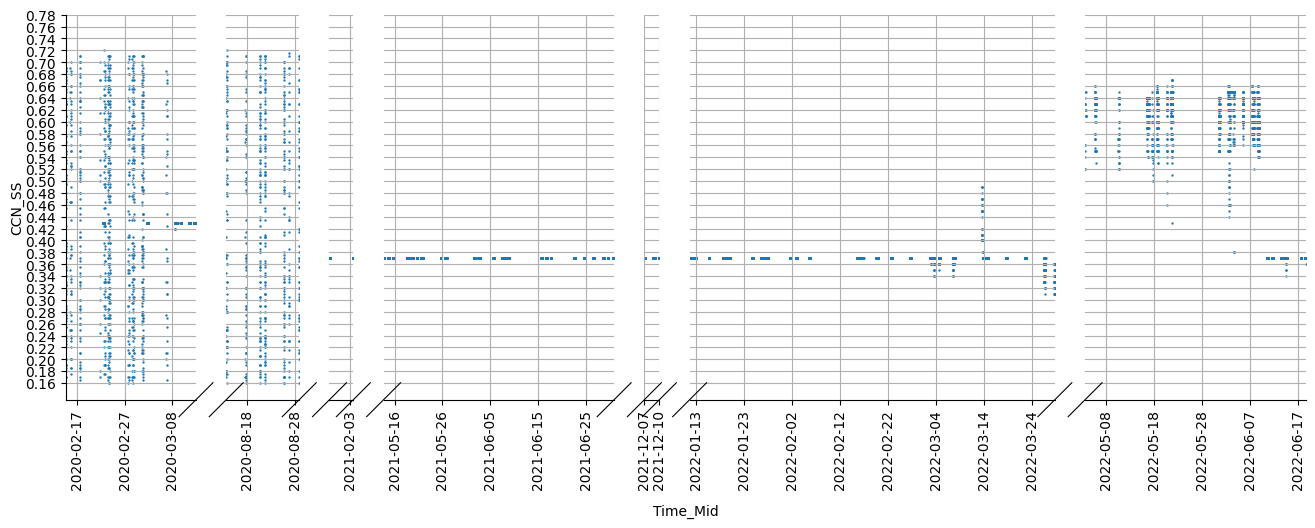

In [6]:
from brokenaxes import brokenaxes
# Assuming 'd' is your DataFrame with 'Time_Mid' and 'CCN_SS' columns
# Convert 'Time_Mid' to datetime if it's not already
d['Time_Mid'] = pd.to_datetime(d['Time_Mid'])

# Calculate the time differences between consecutive points
time_diffs = d['Time_Mid'].diff().dt.days

# Identify where the breaks should occur (where time difference > 10 days)
break_points = np.where(time_diffs > 30)[0]

# Create a list of intervals for the broken x-axis
x_intervals = []
start = 0
for bp in break_points:
    x_intervals.append((d['Time_Mid'].iloc[start], d['Time_Mid'].iloc[bp - 1]))
    start = bp
x_intervals.append((d['Time_Mid'].iloc[start], d['Time_Mid'].iloc[-1]))

fig = plt.figure(figsize=(16, 5))
# Create the brokenaxes plot
bax = brokenaxes(xlims=x_intervals, hspace=.05)

#bax.figure.set_size_inches(12, 6)  # Set figsize here (width, height)

# Plot the data
bax.scatter(d['Time_Mid'], d['CCN_SS'], s=.5)

# Set labels
bax.set_xlabel('Time_Mid', labelpad=75)
bax.set_ylabel('CCN_SS')
# Rotate x-axis labels by 90 degrees
for ax in bax.axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.grid(True)  # Add grid
    ax.set_yticks(np.arange(.16, .8, step=.02))  # Add more y-ticks

    # Set x-axis ticks every 15 days
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Ticks every 15 days
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates as YYYY-MM-DD
# Show the plot
plt.savefig('../figures/CCN_SS_time_series.png', dpi=300, bbox_inches='tight')

In [7]:
#d = d[(d['Org_Ave_IsoK_STP']>=0) & (d['SO4_Ave_IsoK_STP']>=0) & (d['NO3_Ave_IsoK_STP']>=0) & (d['NH4_Ave_IsoK_STP']>=0) & (d['Chl_Ave_IsoK_STP']>=0)]

In [8]:
'''
ams_keys = ['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']
for i in range(0,5):
    d.loc[d[ams_keys[i]]<0,ams_keys[i]] = 0
d['ams_tot'] = d.loc[:,['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']].sum(axis=1)
'''

"\nams_keys = ['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']\nfor i in range(0,5):\n    d.loc[d[ams_keys[i]]<0,ams_keys[i]] = 0\nd['ams_tot'] = d.loc[:,['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']].sum(axis=1)\n"

In [9]:
d['OMF'] = d['Org_Ave_IsoK_STP']/d['ams_tot']

<Figure size 1000x600 with 0 Axes>

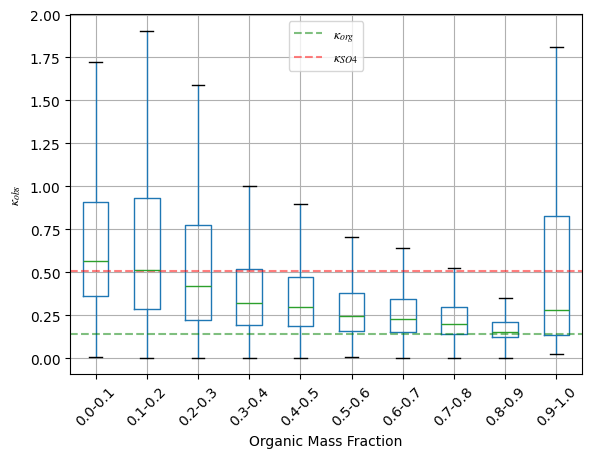

In [10]:
# Assuming 'd' is your DataFrame containing 'CO_ppm' and 'k_obs' columns
# Define CO_ppm ranges (bins) - adjust as needed
#d_sub = sub_m2[sub_m2['CCN_SS']==0.37]
d_sub = d
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
plt.show()
# Bin 'CO_ppm' values
d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)

# Plot boxplot of 'k_obs' for each CO_ppm range
plt.figure(figsize=(10, 6))
d_sub.boxplot(column='k_obs', by='OMF_range', grid=True, showfliers=False)
plt.title('')
plt.axhline(.14, c='green', ls='--', alpha=.5, label=r'$\kappa _{org}$')
plt.axhline(.507, c='red', ls='--', alpha=.5, label=r'$\kappa _{SO4}$')
plt.legend()
plt.suptitle('')  # Removes the automatic boxplot subtitle
plt.xlabel('Organic Mass Fraction')
plt.ylabel(r'$\kappa _{obs}$')
plt.xticks(rotation=45)
#plt.ylim([0, 0.15])
plt.savefig('../figures/k_obs_v_OMF.png', dpi=300, bbox_inches='tight')
plt.show()

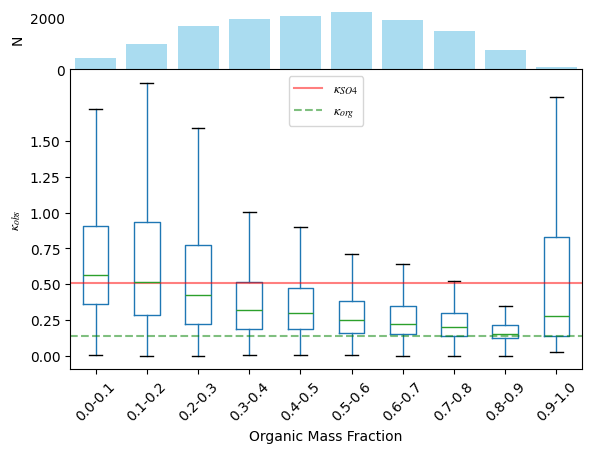

In [11]:
# Define the OMF bins and labels
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
d_sub = d.copy()

# Bin 'OMF' values
d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)

# Create figure and gridspec layout for distribution on top and boxplot below
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 5]}, sharex=True)

# Count the number of points in each 'OMF_range' bin
counts = d_sub['OMF_range'].value_counts().reindex(labels).fillna(0)  # Ensure the correct order and fill missing bins with 0

# Plot the counts as a bar chart on the top subplot
ax[0].bar(np.linspace(1,10,10), counts.values, color='skyblue', alpha=0.7)
ax[0].set_ylabel('N')
ax[0].grid(True, axis='y')

# Plot boxplot of 'k_obs' for each OMF_range on the bottom subplot
d_sub.boxplot(column='k_obs', by='OMF_range', grid=False, showfliers=False, ax=ax[1])
ax[1].axhline(.507, color='red', linestyle='-', alpha=.5, label=r'$\kappa _{SO4}$')
ax[1].axhline(.14, color='green', linestyle='--', alpha=.5, label=r'$\kappa _{org}$')
ax[1].legend()
ax[1].set_xlabel('Organic Mass Fraction')
ax[1].set_ylabel(r'$\kappa _{obs}$')
ax[1].set_xticklabels(labels, rotation=45)
plt.subplots_adjust(hspace=0)
# Adjust plot and save
plt.suptitle('')  # Remove automatic title
ax[1].set_title('')
ax[1].set_yticks([0,.25,.5,.75,1,1.25,1.5])
for spine in ax[0].spines.values():
    spine.set_visible(False)
ax[0].grid(False)
ax[0].tick_params(axis='both', which='both', length=0)
#plt.tight_layout()
plt.savefig('../figures/k_obs_v_OMF_with_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

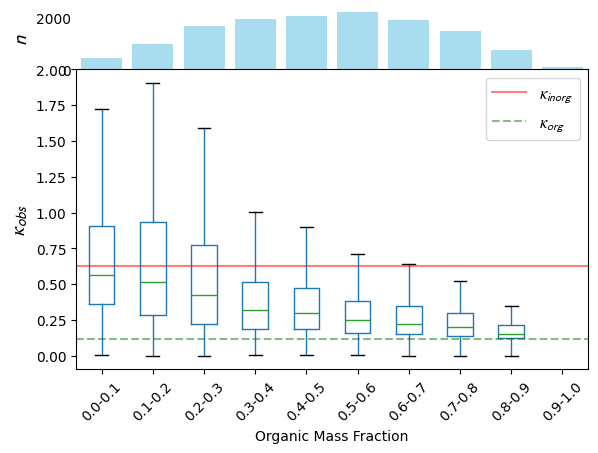

In [12]:
# Define the OMF bins and labels
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
d_sub = d.copy()

# Bin 'OMF' values
d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)

# Create figure and gridspec layout for distribution on top and boxplot below
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 5]}, sharex=True)

# Count the number of points in each 'OMF_range' bin
counts = d_sub['OMF_range'].value_counts().reindex(labels).fillna(0)  # Ensure the correct order and fill missing bins with 0

for l in range(0,len(counts)):
    if counts.iloc[l]< 75:
        d_sub.loc[d_sub['OMF_range']==counts.index[l],'k_obs'] = np.nan

# Plot the counts as a bar chart on the top subplot
ax[0].bar(np.linspace(1,10,10), counts.values, color='skyblue', alpha=0.7)
ax[0].set_ylabel(r'$\mathsf{n}$', fontsize=15)
ax[0].grid(True, axis='y')

# Plot boxplot of 'k_obs' for each OMF_range on the bottom subplot
d_sub.boxplot(column='k_obs', by='OMF_range', grid=False, showfliers=False, ax=ax[1])
ax[1].axhline(.63, color='red', linestyle='-', alpha=.5, label=r'$\kappa _\mathsf{inorg}$')
ax[1].axhline(.12, color='green', linestyle='--', alpha=.5, label=r'$\kappa _\mathsf{org}$')
ax[1].legend(fontsize=12)
ax[1].set_xlabel('Organic Mass Fraction')
ax[1].set_ylabel(r'$\kappa _\mathsf{obs}$', fontsize=15)
ax[1].set_xticklabels(labels, rotation=45)
plt.subplots_adjust(hspace=0)
# Adjust plot and save
plt.suptitle('')  # Remove automatic title
ax[1].set_title('')
ax[1].set_yticks([0,.25,.5,.75,1,1.25,1.5, 1.75, 2])
for spine in ax[0].spines.values():
    spine.set_visible(False)
ax[0].grid(False)
ax[0].tick_params(axis='both', which='both', length=0)
#plt.tight_layout()
plt.savefig('../figures/k_obs_v_OMF_with_distribution_thresh.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
rem_k = ['Takeoff/Landing', 'Transit', 'Descent', 'Ascent', 'Other', 'Slant/Spiral', 'Remote Sensing (HSRL-2)']

In [14]:
for i in range(0,len(rem_k)):
    d.loc[d['leg']==rem_k[i], 'leg'] = np.nan

In [15]:
transit_flights = [pd.Timestamp('2022-03-22').date(), pd.Timestamp('2022-05-18').date(), pd.Timestamp('2022-05-21').date(), pd.Timestamp('2022-05-31').date(), pd.Timestamp('2022-06-18').date()]
df_winter = d[d['Time_Mid'].dt.month.isin([11, 12, 1, 2, 3, 4]) & (~d['Time_Mid'].dt.date.isin(transit_flights))]
df_spring = d[d['Time_Mid'].dt.month.isin([5, 6]) & (np.logical_not((d['Time_Mid'].dt.month.isin([6])) & (d['Time_Mid'].dt.year.isin([2022])))) & (~d['Time_Mid'].dt.date.isin(transit_flights))]
df_summer = d[d['Time_Mid'].dt.month.isin([8, 9]) & (~d['Time_Mid'].dt.date.isin(transit_flights))]
df_bermuda = d[(d['Time_Mid'].dt.month.isin([6])) & (d['Time_Mid'].dt.year.isin([2022])) & (~d['Time_Mid'].dt.date.isin(transit_flights))]

In [16]:
d[d['Time_Mid'].dt.month.isin([5, 6]) & (d['Time_Mid'].dt.year.isin([2022])) & (np.logical_not((d['Time_Mid'].dt.month.isin([6])) & (d['Time_Mid'].dt.year.isin([2022])))) & (~d['Time_Mid'].dt.date.isin(transit_flights))]['CCN_SS'].describe()

count    458.000000
mean       0.610360
std        0.035555
min        0.460000
25%        0.600000
50%        0.620000
75%        0.640000
max        0.660000
Name: CCN_SS, dtype: float64

In [17]:
d[d['Time_Mid'].dt.year.isin([2020])]['CCN_SS'].describe()

count    2437.000000
mean        0.434994
std         0.132491
min         0.160000
25%         0.365000
50%         0.430000
75%         0.510000
max         0.720000
Name: CCN_SS, dtype: float64

In [18]:
d[d['Time_Mid'].dt.date.isin(transit_flights)]

,Unnamed: 0.1,level_0,Unnamed: 0,index,Time_Mid,SMPS_Bin01,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,...,D_c,CCN_n_pred,non_org,Org_vc,non_org_vc,ams_tot_vc,k,inorg_tot,OMF,OMF_range
10308,10308,13115,20853,20853,2022-03-22 12:46:57.500,NaN,NaN,NaN,NaN,NaN,...,80.900645,800.099402,1.088,0.001828,0.000777,0.002605,0.213352,1.088,0.748265,0.7-0.8
10309,10309,13116,20854,20854,2022-03-22 12:47:57.500,NaN,NaN,NaN,NaN,NaN,...,76.672774,1025.550434,1.538,0.001667,0.001099,0.002766,0.250946,1.538,0.657232,0.6-0.7
10310,10310,13117,20855,20855,2022-03-22 12:48:57.500,NaN,NaN,NaN,NaN,NaN,...,76.385123,1198.421281,1.699,0.001785,0.001214,0.002998,0.253812,1.699,0.650124,0.6-0.7
10311,10311,13118,20856,20856,2022-03-22 12:49:57.500,NaN,NaN,NaN,NaN,NaN,...,76.626872,1323.628164,2.312,0.002493,0.001651,0.004145,0.251400,2.312,0.656106,0.6-0.7
10312,10312,13119,20857,20857,2022-03-22 12:50:57.500,NaN,NaN,NaN,NaN,NaN,...,78.642627,762.580411,1.739,0.002322,0.001242,0.003564,0.232426,1.739,0.702583,0.7-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13665,13665,16801,26602,26602,2022-06-18 15:11:01.500,NaN,0.0,0.0,0.0,0.00,...,82.961484,2225.347320,1.877,0.003873,0.001341,0.005214,0.197711,1.877,0.784970,0.7-0.8
13666,13666,16802,26603,26603,2022-06-18 15:12:01.500,0.0,0.0,0.0,0.0,3172.65,...,82.597500,1804.342713,1.830,0.003642,0.001307,0.004949,0.200360,1.830,0.778799,0.7-0.8
13667,13667,16803,26604,26604,2022-06-18 15:13:01.500,0.0,0.0,0.0,0.0,0.00,...,81.720065,2067.677857,2.042,0.003724,0.001459,0.005183,0.206944,2.042,0.763384,0.7-0.8
13668,13668,16804,26605,26605,2022-06-18 15:14:01.500,0.0,0.0,0.0,0.0,0.00,...,82.425342,1915.616224,2.026,0.003964,0.001447,0.005411,0.201630,2.026,0.775835,0.7-0.8


In [19]:
df_bermuda[df_bermuda['Time_Mid'].dt.day.isin([18])]

,Unnamed: 0.1,level_0,Unnamed: 0,index,Time_Mid,SMPS_Bin01,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,...,D_c,CCN_n_pred,non_org,Org_vc,non_org_vc,ams_tot_vc,k,inorg_tot,OMF,OMF_range


In [20]:
d_seg = [df_winter, df_spring, df_summer, df_bermuda]

In [21]:
(df_summer['CCN_n_pred']/df_summer['N_CCN_stdPT']).describe()

count    526.000000
mean       2.102028
std        3.764506
min        0.088571
25%        0.893423
50%        1.026019
75%        1.256807
max       39.346883
dtype: float64

In [22]:
len(d['CCN_SS'].unique())

118

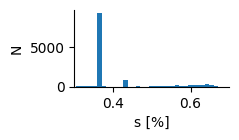

In [23]:
fig, ax = plt.subplots(figsize=(2,1))
d.dropna(subset=['CCN_n_pred','N_CCN_stdPT'])['CCN_SS'].plot.hist(bins=50)
plt.ylabel('N')
plt.xlabel('s [%]')
ax.set_xlim([.3,.7])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig('../figures/ss_hist.png', dpi=1000, bbox_inches='tight')

In [24]:
d_calc = d.dropna(subset=['CCN_n_pred','N_CCN_stdPT'])
len(d_calc[d_calc['CCN_SS']==0.37]) / (len(d_calc[d_calc['CCN_SS']==0.37]) + len(d_calc[d_calc['CCN_SS']!=0.37]))

0.6933454600576019

In [25]:
(df_bermuda['CCN_n_pred']/df_bermuda['N_CCN_stdPT']).describe()

count    1887.000000
mean        1.006722
std         0.802361
min         0.153844
25%         0.686029
50%         0.815008
75%         1.036188
max        12.568357
dtype: float64

In [26]:
count = 0
for i in range(0,len(d_seg)):
    count += len(d_seg[i])

In [27]:
df_winter['leg'].unique()

array([nan, 'BCB', 'ACB', 'MinAlt', 'ACT', 'BCT', 'ABL', 'BBL'],
      dtype=object)

In [28]:
for i in range(0,4):
    d_seg[i]

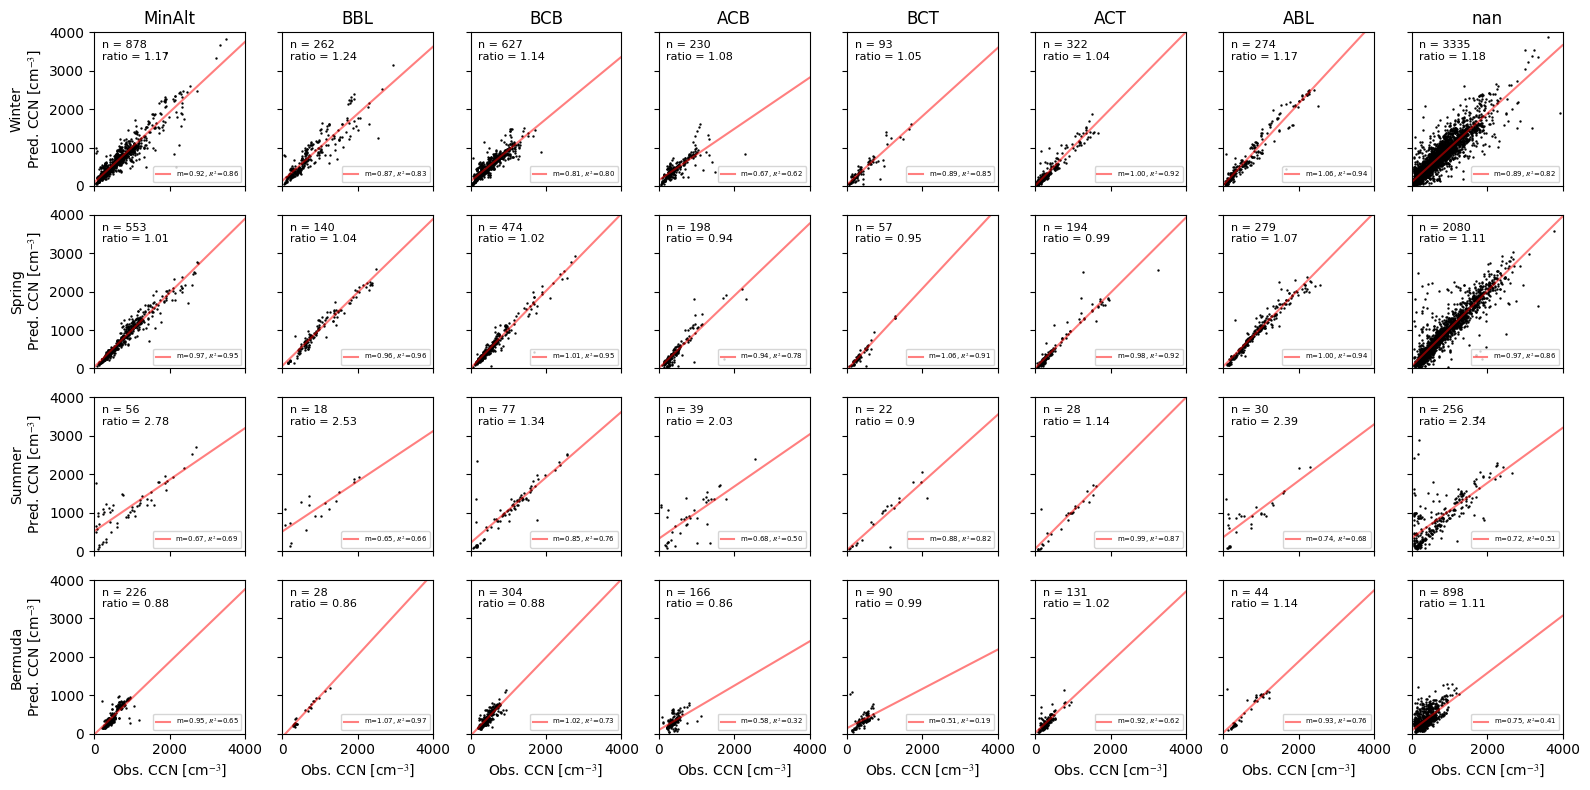

In [29]:
fig,axes = plt.subplots(4,8,figsize=(16, 8),sharex='all', sharey='all')
save_k = ['MinAlt','BBL','BCB','ACB','BCT', 'ACT','ABL',np.nan]

ax_min,ax_max = [0,4000]
j = 0 # range 0 - 7
k = 0 # range 0 - 4
for i, ax in enumerate(axes.flatten()):
    d_i = d_seg[k].loc[d_seg[k]['leg']==save_k[j]]
    if pd.isna(save_k[j]):
        d_i = d_seg[k].loc[pd.isna(d_seg[k]['leg'])]

    d_i = d_i.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
    ax.scatter(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'], s=0.5, c='black')

    
    slope, intercept, r_value, p_value, std_err = linregress(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'])
    # Calculate the line of best fit
    fit_line = slope * np.linspace(ax_min,ax_max) + intercept
    ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label=f'm={slope:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
    ax.legend(fontsize=5, loc='lower right')
    mask = ~np.isnan(d_i['N_CCN_stdPT']) & ~np.isnan(d_i['CCN_n_pred'])
    num_points = np.sum(mask)
    ax.text(0.05, 0.95, f"n = {num_points}\nratio = {round((d_i['CCN_n_pred']/d_i['N_CCN_stdPT']).mean(),2)}",
         fontsize=8, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')



    # conditions of which leg/df to select
    j+=1
    if j == 8:
        j = 0
        k += 1

axes[0,0].set_xlim([0,4000])
axes[0,0].set_ylim([0,4000])

season = ['Winter', 'Spring', 'Summer', 'Bermuda']
for i in range(0,4):
    axes[i,0].set_ylabel(season[i]+'\nPred. CCN [cm$^{-3}$]')
for i in range(0,8):
    axes[3,i].set_xlabel('Obs. CCN [cm$^{-3}$]')
for i,ax in enumerate(axes[0,:]):
    ax.set_title(str(save_k[i]))
    
plt.tight_layout()
plt.savefig('../figures/season_legs.png', dpi=300)

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/4258489508.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label='m='+f'{slope:.2f}\n' + 'R$^\mathsf{2}$=' + f'{r_value**2:.2f}', alpha=.5)


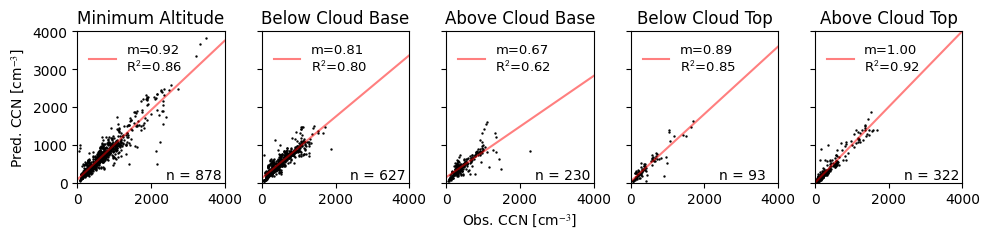

In [30]:
fig,axes = plt.subplots(1,5,figsize=(10, 2.5),sharex='all', sharey='all')
save_k = ['MinAlt','BCB','ACB','BCT', 'ACT']
save_k_l = ['Minimum Altitude','Below Cloud Base','Above Cloud Base','Below Cloud Top', 'Above Cloud Top']

ax_min,ax_max = [0,4000]
j = 0 # range 0 - 7
k = 0 # range 0 - 4
for i, ax in enumerate(axes.flatten()):
    d_i = d_seg[k].loc[d_seg[k]['leg']==save_k[j]]
    if pd.isna(save_k[j]):
        d_i = d_seg[k].loc[pd.isna(d_seg[k]['leg'])]

    d_i = d_i.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
    ax.scatter(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'], s=0.5, c='black')

    
    slope, intercept, r_value, p_value, std_err = linregress(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'])
    # Calculate the line of best fit
    fit_line = slope * np.linspace(ax_min,ax_max) + intercept
    ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label='m='+f'{slope:.2f}\n' + 'R$^\mathsf{2}$=' + f'{r_value**2:.2f}', alpha=.5)
    ax.legend(fontsize=9.5, loc='upper left', frameon=False)
    mask = ~np.isnan(d_i['N_CCN_stdPT']) & ~np.isnan(d_i['CCN_n_pred'])
    num_points = np.sum(mask)
    ax.text(0.6, 0.1, f"n = {num_points}",
         fontsize=10, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')



    # conditions of which leg/df to select
    j+=1
    if j == 8:
        j = 0
        k += 1

axes[0].set_xlim([0,4000])
axes[0].set_ylim([0,4000])
axes[0].set_ylabel('Pred. CCN [cm$^{-3}$]')
axes[2].set_xlabel('Obs. CCN [cm$^{-3}$]')
#fig.suptitle('Winter')
for i,ax in enumerate(axes):
    ax.set_title(str(save_k_l[i]))
'''
season = ['Winter', 'Spring', 'Summer', 'Bermuda']
for i in range(0,4):
    axes[i,0].set_ylabel(season[i]+'\nPred. CCN [cm$^{-3}$]')
for i in range(0,8):
    axes[3,i].set_xlabel('Obs. CCN [cm$^{-3}$]')
for i,ax in enumerate(axes[0,:]):
    ax.set_title(str(save_k[i]))
'''
plt.tight_layout()
plt.savefig('../figures/winter_legs.png', dpi=300, bbox_inches='tight')

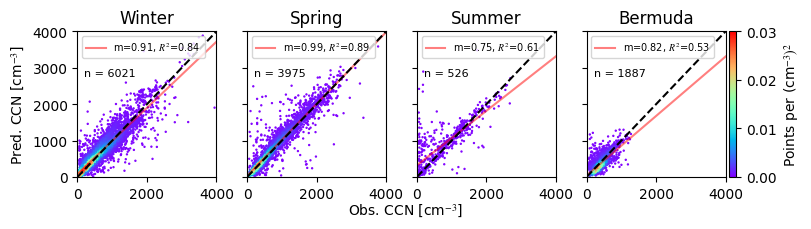

In [31]:
fig, axes = plt.subplots(1,4, figsize=(8,2), sharey=True, sharex=True, constrained_layout=True)
ax_min,ax_max = 0,4000
season2 = ['Winter', 'Spring', 'Summer', 'Bermuda']
for i in range(0,4):
    ax = axes[i]
    p_d = d_seg[i].dropna(subset=['N_CCN_stdPT', 'CCN_n_pred']) # panel data


    # Calculate point density
    xy = np.vstack([p_d['N_CCN_stdPT'], p_d['CCN_n_pred']])
    z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

    slope, intercept, r_value, p_value, std_err = linregress(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'])

    fit_line = slope * np.linspace(ax_min,ax_max) + intercept
    ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label=f'm={slope:.2f}, $R^2$={r_value**2:.2f}', alpha=.5, ls='-')
    ax.plot(np.linspace(ax_min,ax_max), np.linspace(ax_min,ax_max), c='black', alpha=1, ls='--')
    ax.legend(fontsize=7, loc='upper left')
    # plot data
    scatter = ax.scatter(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'], s=0.5, c=z, cmap='rainbow', vmin=0, vmax=0.03)

    ax.text(0.05, 0.75, f"n = {len(p_d['N_CCN_stdPT'])}",
         fontsize=8, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')

    # add labels
    ax.set_title(season2[i])
fig.colorbar(scatter, ax=ax, orientation='vertical', label='Points per (cm$^{-3})^2$', pad=-.1)
ax.set_xlim([ax_min,ax_max])
ax.set_ylim([ax_min,ax_max])
axes[0].set_ylabel('Pred. CCN [cm$^{-3}$]')
fig.text(0.5, -0.05, 'Obs. CCN [cm$^{-3}$]', ha='center')
plt.savefig('../figures/seasons_all.png', dpi=300, bbox_inches='tight')

In [32]:
model = LinearRegression(fit_intercept=False)

model.fit(p_d['N_CCN_stdPT'].values.reshape(-1,1), p_d['CCN_n_pred'].values.reshape(-1,1))

LinearRegression(fit_intercept=False)

In [33]:
model.coef_

array([[0.90325261]])

In [34]:
model.score(p_d['N_CCN_stdPT'].values.reshape(-1,1), p_d['CCN_n_pred'].values.reshape(-1,1))

0.5189932278674431

In [35]:
z.max()

np.float64(0.026772455938648236)

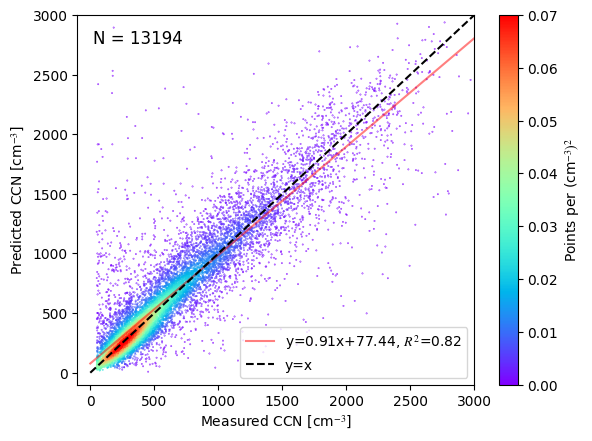

In [36]:
sub_m2 = d.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
# Define the data
x = sub_m2['N_CCN_stdPT']
y = sub_m2['CCN_n_pred']
mask = ~np.isnan(x) & ~np.isnan(y)
num_points = np.sum(mask)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the line of best fit
fit_line = slope * np.linspace(0, x.max()) + intercept

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

# Plot the data and best fit line
plt.plot(np.linspace(0, x.max()), fit_line, c='r', label=f'y={slope:.2f}x+{intercept:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
plt.plot(np.linspace(0, x.max()), np.linspace(0, x.max()), c='black', ls='--', label='y=x')
plt.scatter(x, y, s=0.1, alpha=1, c=z, cmap='rainbow', vmin=0, vmax=0.07)

#plt.xlim([-100, x.max()])
#plt.ylim([-100, x.max()])
plt.xlim([-100, 3000])
plt.ylim([-100, 3000])
plt.ylabel('Predicted CCN [cm$^{-3}$]')
plt.xlabel('Measured CCN [cm$^{-3}$]')
plt.colorbar(label='Points per (cm$^{-3})^2$')

plt.text(0.15, 0.85, f"N = {num_points}",
         fontsize=12, transform=plt.gcf().transFigure,
         verticalalignment='top', horizontalalignment='left')

plt.legend(loc='lower right')
plt.savefig('../figures/closure_all_non_org_cbar.png', dpi=300, bbox_inches='tight')

In [37]:
z.max()

np.float64(0.07432113523820078)

In [38]:
def calc_density(x,y):
    # Define grid boundaries and resolution
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    bin_size = 10  # Bin size in cm^-3
    x_bins = np.arange(x_min, x_max + bin_size, bin_size)
    y_bins = np.arange(y_min, y_max + bin_size, bin_size)

    # Compute 2D histogram
    counts, x_edges, y_edges = np.histogram2d(x, y, bins=[x_bins, y_bins])

    # Calculate the area of each grid cell (cm^-3)^2
    cell_area = bin_size ** 2

    # Convert counts to points per (cm^-3)^2
    density = counts / cell_area

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/2107601312.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/2107601312.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/2107601312.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

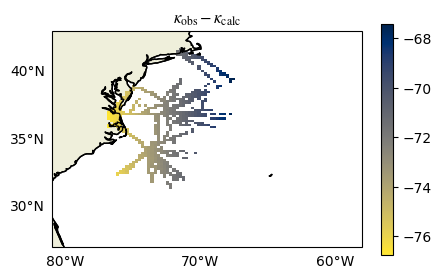

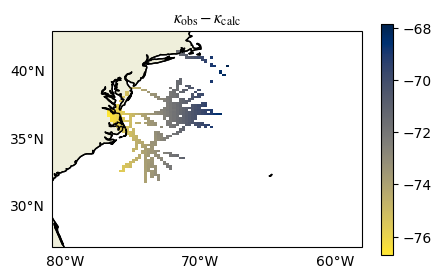

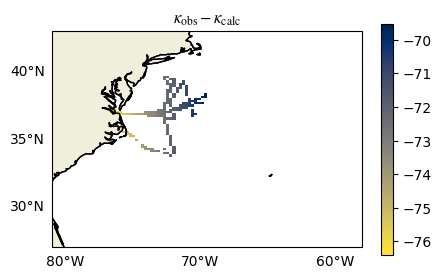

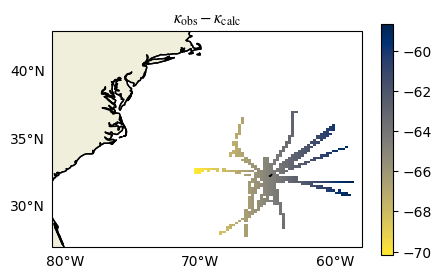

In [39]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''
for d_1 in d_seg:

    # Set up the map projection and plot area
    fig, ax = plt.subplots(figsize=(5,3), subplot_kw={'projection': ccrs.PlateCarree()})

    plt_key = ['Longitude', 'k', 'CO_ppm']
    cmap_labels = [r'$\kappa _\mathcal{obs} - \kappa _\mathcal{calc}$', r'$\kappa _\mathcal{calc}$', 'CO [ppm]']

    i=0
    data = d_1.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]


    #ax=axes[i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='cividis_r', transform=ccrs.PlateCarree())
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
    gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees

    gl.xlines = False
    gl.ylines = False

    # Set title
    #ax.set_title('Northwest Atlantic Sampling Heatmap by Time')

    # Show the plot
    #plt.savefig('../figures/k_obs_map_diff.png', dpi=1000)

In [40]:
df_spring[df_spring['OMF']>.9]

,Unnamed: 0.1,level_0,Unnamed: 0,index,Time_Mid,SMPS_Bin01,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,...,D_c,CCN_n_pred,non_org,Org_vc,non_org_vc,ams_tot_vc,k,inorg_tot,OMF,OMF_range
2616,2616,5018,8955,8955,2021-05-13 18:52:51.500,NaN,NaN,0.00,0.0,0.00,...,103.293094,109.569535,0.004,0.000693,0.000003,0.000696,0.101560,0.004,0.996748,0.9-1.0
2682,2682,5086,9062,9062,2021-05-14 13:46:26.500,NaN,NaN,0.00,0.0,0.00,...,97.299370,55.593070,0.073,0.000854,0.000052,0.000906,0.121863,0.073,0.953914,0.9-1.0
2855,2855,5263,9373,9373,2021-05-15 18:42:41.500,0.0,0.0,0.00,0.0,0.00,...,95.768536,139.180803,0.043,0.000388,0.000031,0.000419,0.127888,0.043,0.941015,0.9-1.0
3050,3050,5461,9614,9614,2021-05-18 17:58:49.500,NaN,0.0,0.00,0.0,0.00,...,99.592002,151.056320,0.031,0.000600,0.000022,0.000622,0.113517,0.031,0.971638,0.9-1.0
3491,3491,5902,10153,10153,2021-05-20 17:36:43.500,NaN,0.0,0.00,0.0,0.00,...,94.740893,156.842259,0.121,0.000935,0.000086,0.001021,0.132154,0.121,0.931831,0.9-1.0
4267,4267,6692,11392,11392,2021-06-02 18:34:15.500,NaN,NaN,0.00,0.0,0.00,...,94.388557,81.742011,0.058,0.000426,0.000041,0.000468,0.133663,0.058,0.928571,0.9-1.0
4556,4556,6984,11820,11820,2021-06-07 18:22:31.500,NaN,NaN,0.00,0.0,0.00,...,95.664627,147.916001,0.102,0.000905,0.000073,0.000978,0.128312,0.102,0.940106,0.9-1.0
4557,4557,6985,11821,11821,2021-06-07 18:23:31.500,NaN,NaN,0.00,0.0,0.00,...,92.450501,62.948123,0.211,0.001201,0.000151,0.001352,0.142362,0.211,0.909675,0.9-1.0
4560,4560,6988,11824,11824,2021-06-07 18:26:31.500,NaN,NaN,0.00,0.0,0.00,...,92.027219,116.603527,0.091,0.000492,0.000065,0.000557,0.144360,0.091,0.905307,0.9-1.0
4603,4603,7031,11878,11878,2021-06-07 19:36:30.500,NaN,NaN,0.00,0.0,1662.53,...,103.053126,106.880749,0.005,0.000591,0.000004,0.000594,0.102284,0.005,0.995238,0.9-1.0


In [41]:
for i in range(len(d_seg)):
    print(d_seg[i]['Time_Mid'].min(), d_seg[i]['Time_Mid'].max())

2020-02-14 17:02:30.500000 2022-03-28 20:19:32.500000
2021-05-13 17:05:52.500000 2022-05-20 16:36:35.500000
2020-08-13 14:06:01.500000 2020-08-28 20:01:18.500000
2022-06-02 11:20:29.500000 2022-06-17 16:56:17.500000


In [42]:
d_seg[0]

,Unnamed: 0.1,level_0,Unnamed: 0,index,Time_Mid,SMPS_Bin01,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,...,D_c,CCN_n_pred,non_org,Org_vc,non_org_vc,ams_tot_vc,k,inorg_tot,OMF,OMF_range
0,0,0,0,0,2020-02-14 17:02:30.500,NaN,NaN,NaN,NaN,NaN,...,91.454619,435.704236,2.718,0.000510,0.001941,0.002451,0.400957,2.718,0.249171,0.2-0.3
1,1,1,1,1,2020-02-14 17:03:30.500,NaN,NaN,NaN,NaN,NaN,...,47.004317,NaN,2.502,0.000669,0.001787,0.002456,0.376526,2.502,0.321031,0.3-0.4
2,2,2,2,2,2020-02-14 17:04:30.500,NaN,NaN,NaN,NaN,NaN,...,78.577014,280.657665,2.648,0.000440,0.001891,0.002332,0.408236,2.648,0.227313,0.2-0.3
3,3,3,3,3,2020-02-14 17:05:30.500,NaN,NaN,NaN,NaN,NaN,...,42.087615,NaN,1.699,0.000126,0.001214,0.001340,0.444242,1.699,0.116025,0.1-0.2
4,4,4,4,4,2020-02-14 17:06:30.500,NaN,NaN,NaN,NaN,NaN,...,68.310239,NaN,2.147,0.000279,0.001534,0.001813,0.421463,2.147,0.187050,0.1-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10734,10734,13599,21569,21569,2022-03-28 20:11:32.500,NaN,0.00,975.95,3935.96,1170.39,...,75.200047,507.930142,0.924,0.000724,0.000660,0.001384,0.281196,0.924,0.580952,0.5-0.6
10735,10735,13600,21570,21570,2022-03-28 20:12:32.500,NaN,0.00,1578.03,0.00,0.00,...,74.081591,603.295096,0.994,0.000566,0.000710,0.001276,0.311372,0.994,0.502004,0.5-0.6
10736,10736,13601,21572,21572,2022-03-28 20:15:32.500,NaN,2795.81,0.00,2837.93,0.00,...,74.086887,464.523548,0.706,0.000483,0.000504,0.000987,0.294144,0.706,0.547436,0.5-0.6
10737,10737,13602,21573,21573,2022-03-28 20:17:32.500,NaN,2461.95,0.00,0.00,2229.17,...,71.733857,512.861421,1.150,0.000462,0.000821,0.001284,0.343133,1.150,0.415650,0.4-0.5


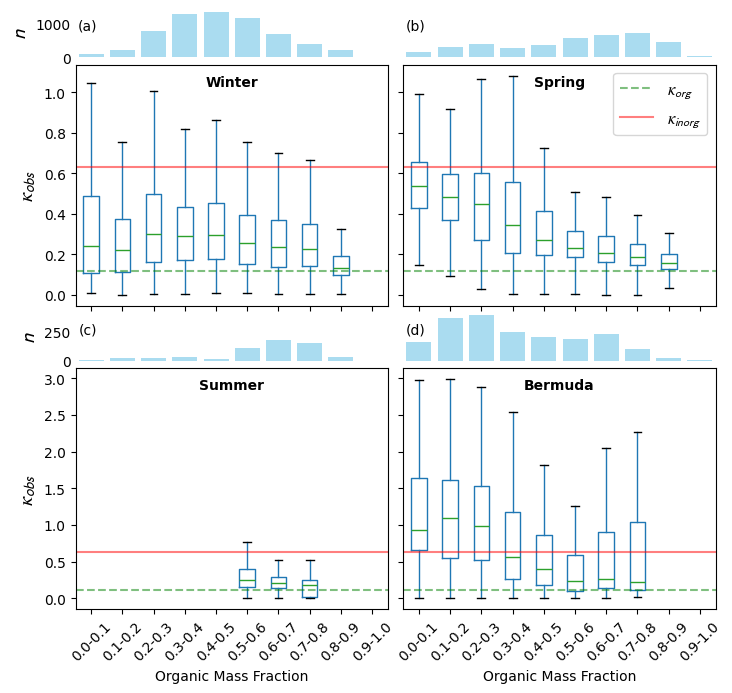

In [43]:
# Define the OMF bins and labels
mpl.rcParams['mathtext.fontset'] = 'stix'
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
season2 = ['Winter', 'Spring', 'Summer', 'Bermuda']
# Create figure and gridspec layout for distribution on top and boxplot below
fig, axes = plt.subplots(4, 2, figsize=(8,8), gridspec_kw={'height_ratios': [1, 5, 1, 5]}, sharex='all', sharey='row')
j = 0
k = 0
for i in range(0,4):
    if i == 1:
        j,k = 0,1
    if i == 2:
        j,k = 2,0
    if i == 3:
        j,k = 2,1

    d_sub = d_seg[i].copy()

    # Bin 'OMF' values
    d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)


    # Count the number of points in each 'OMF_range' bin
    counts = d_sub['OMF_range'].value_counts().reindex(labels).fillna(0)  # Ensure the correct order and fill missing bins with 0

    for l in range(0,len(counts)):
        if counts.iloc[l]< 75:
            d_sub.loc[d_sub['OMF_range']==counts.index[l],'k_obs'] = np.nan

    # Plot the counts as a bar chart on the top subplot
    #axes[j,k].set_title(season[i])
    axes[j,k].bar(np.linspace(1,10,10), counts.values, color='skyblue', alpha=0.7)
    
    axes[j,k].grid(True, axis='y')

    # Plot boxplot of 'k_obs' for each OMF_range on the bottom subplot
    d_sub.boxplot(column='k_obs', by='OMF_range', grid=False, showfliers=False, ax=axes[j+1,k])
    axes[j+1,k].axhline(.12, color='green', linestyle='--', alpha=0.5, label=r'$\kappa _\mathsf{org}$')
    axes[j+1,k].axhline(.63, color='red', linestyle='-', alpha=0.5, label=r'$\kappa _\mathsf{inorg}$')
    axes[j+1,k].text(0.5, .9, season2[i], transform=axes[j+1,k].transAxes, ha='center', va='bottom', fontweight='bold')
    axes[j+1,k].set_xlabel('')
    if k ==0:
        axes[j,k].set_ylabel(r'$\mathsf{n}$', fontsize=15)
        axes[j+1,k].set_ylabel(r'$\kappa _\mathsf{obs}$', fontsize=15)
    
    plt.subplots_adjust(hspace=.05)
    plt.subplots_adjust(wspace=.05)
    # Adjust plot and save
    plt.suptitle('')  # Remove automatic title
    axes[j+1,k].set_title('')
    #axes[1,0].set_yticks([0,.25,.5,.75,1,1.25,1.5])
    for spine in axes[j,k].spines.values():
        spine.set_visible(False)
    axes[j,k].grid(False)
    axes[j,k].tick_params(axis='both', which='both', length=0)

axes[1,1].legend(fontsize=12)
axes[3,0].set_xlabel('Organic Mass Fraction')
axes[3,1].set_xlabel('Organic Mass Fraction')
axes[3, 0].set_xticks(np.arange(1, 11))
axes[3,0].set_xticklabels(labels, rotation=45)
axes[3, 1].set_xticks(np.arange(1, 11))
axes[3,1].set_xticklabels(labels, rotation=45)
#plt.tight_layout()
panel_labels = ['(a)', '(b)', '', '', '(c)', '(d)', '','']
for ax, label in zip(axes.flat, panel_labels):
    ax.text(0.07, .8, label, transform=ax.transAxes, va='top', ha='right')
plt.savefig('../figures/k_obs_v_OMF_with_distribution_season.png', dpi=300, bbox_inches='tight')
plt.show()

In [44]:
pils = pd.read_csv('../tables/PILS_merged.csv')
pils['OMF'] = pils['Org_Ave_IsoK_STP']/pils['ams_tot']
seas = ['Winter', 'Spring', 'Summer', 'Bermuda']
SO4 = []
NO3 = []
NH4 = []
Chl = []
CO = []
abs532 = []
fRH = []
SeaSalt = []
Ca_nssmf = []

Ca_mf = []
Na_mf = []  # Sodium mass fraction
K_mf = []   # Potassium mass fraction
Mg_mf = []  # Magnesium mass fraction
Cl_mf = []  # Chloride mass fraction
NO3_mf = [] # Nitrate mass fraction
SO4_mf = [] # Sulfate mass fraction
Ox_mf = []  # Oxalate mass fraction
NH4_mf = [] # Ammonium mass fraction

for i in range(0,4):
    if i != 2:
        d_lomf = d_seg[i][d_seg[i]['OMF']<.3]
        SO4.append((d_lomf['SO4_Ave_IsoK_STP']/d_lomf['inorg_tot']).mean())
        NO3.append((d_lomf['NO3_Ave_IsoK_STP']/d_lomf['inorg_tot']).mean())
        NH4.append((d_lomf['NH4_Ave_IsoK_STP']/d_lomf['inorg_tot']).mean())
        Chl.append((d_lomf['Chl_Ave_IsoK_STP']/d_lomf['inorg_tot']).mean())
        CO.append(d_lomf['CO_ppm'])
        abs532.append(d_lomf['Abs532_total'])
        fRH.append(d_lomf['fRH550_RH20to80'])
        SeaSalt.append((pils[pils['Season']==seas[i]]['SeaSalt_mf']))
        Ca_nssmf.append((pils[pils['Season']==seas[i]]['Ca_nssmf']))

        d_lomf2 = pils[(pils['Season']==seas[i]) & (pils['OMF']<.3)]
        d_lomf2.dropna(subset=['PILS_tot', 'Sodium', 'Potassium', 'Magnesium', 'Calcium', 'Chloride', 'Nitrate', 'Sulfate', 'Oxalate', 'Ammonium'], inplace=True)
        Na_mf.append((d_lomf2['Sodium'] / d_lomf2['PILS_tot']).mean())  # Sodium mass fraction
        K_mf.append((d_lomf2['Potassium'] / d_lomf2['PILS_tot']).mean())  # Potassium mass fraction
        Mg_mf.append((d_lomf2['Magnesium'] / d_lomf2['PILS_tot']).mean())  # Magnesium mass fraction
        Ca_mf.append((d_lomf2['Calcium'] / d_lomf2['PILS_tot']).mean())
        Cl_mf.append((d_lomf2['Chloride'] / d_lomf2['PILS_tot']).mean())  # Chloride mass fraction
        NO3_mf.append((d_lomf2['Nitrate'] / d_lomf2['PILS_tot']).mean())  # Nitrate mass fraction
        SO4_mf.append((d_lomf2['Sulfate'] / d_lomf2['PILS_tot']).mean())  # Sulfate mass fraction
        Ox_mf.append((d_lomf2['Oxalate'] / d_lomf2['PILS_tot']).mean())  # Oxalate mass fraction
        NH4_mf.append((d_lomf2['Ammonium'] / d_lomf2['PILS_tot']).mean())  # Ammonium mass fraction
        

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/4289030214.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_lomf2.dropna(subset=['PILS_tot', 'Sodium', 'Potassium', 'Magnesium', 'Calcium', 'Chloride', 'Nitrate', 'Sulfate', 'Oxalate', 'Ammonium'], inplace=True)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/4289030214.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_lomf2.dropna(subset=['PILS_tot', 'Sodium', 'Potassium', 'Magnesium', 'Calcium', 'Chloride', 'Nitrate', 'Sulfate', 'Oxalate', 'Ammonium'], inplace=True)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_1

In [45]:
list(d_seg[-1].keys())

['Unnamed: 0.1',
 'level_0',
 'Unnamed: 0',
 'index',
 'Time_Mid',
 'SMPS_Bin01',
 'SMPS_Bin02',
 'SMPS_Bin03',
 'SMPS_Bin04',
 'SMPS_Bin05',
 'SMPS_Bin06',
 'SMPS_Bin07',
 'SMPS_Bin08',
 'SMPS_Bin09',
 'SMPS_Bin10',
 'SMPS_Bin11',
 'SMPS_Bin12',
 'SMPS_Bin13',
 'SMPS_Bin14',
 'SMPS_Bin15',
 'SMPS_Bin16',
 'SMPS_Bin17',
 'SMPS_Bin18',
 'SMPS_Bin19',
 'SMPS_Bin20',
 'SMPS_Bin21',
 'SMPS_Bin22',
 'SMPS_Bin23',
 'SMPS_Bin24',
 'SMPS_Bin25',
 'SMPS_Bin26',
 'SMPS_Bin27',
 'SMPS_Bin28',
 'SMPS_Bin29',
 'SMPS_Bin30',
 'nSMPS',
 'leg',
 'Org_Ave_IsoK_STP',
 'SO4_Ave_IsoK_STP',
 'NO3_Ave_IsoK_STP',
 'NH4_Ave_IsoK_STP',
 'Chl_Ave_IsoK_STP',
 'mz42_Ave_IsoK_STP',
 'mz43_Ave_IsoK_STP',
 'mz44_Ave_IsoK_STP',
 'mz55_Ave_IsoK_STP',
 'mz57_Ave_IsoK_STP',
 'mz58_Ave_IsoK_STP',
 'mz60_Ave_IsoK_STP',
 'mz79_Ave_IsoK_STP',
 'mz91_Ave_IsoK_STP',
 'CCN_SS',
 'N_CCN_stdPT',
 'LAS_Bin01',
 'LAS_Bin02',
 'LAS_Bin03',
 'LAS_Bin04',
 'LAS_Bin05',
 'LAS_Bin06',
 'LAS_Bin07',
 'LAS_Bin08',
 'LAS_Bin09',
 'LAS_Bin

In [46]:
d_seg[-1][d_seg[-1]['OMF']<.3]['D_a'].describe()

count    689.000000
mean      50.942571
std       25.106112
min       23.907857
25%       39.204595
50%       44.531489
75%       51.967475
max      215.879664
Name: D_a, dtype: float64

In [47]:
d_seg[-1][d_seg[-1]['OMF']<.3]['D_c'].describe()

count    911.000000
mean      59.114949
std        8.694341
min       42.379767
25%       47.396001
50%       63.865808
75%       65.013976
max       66.601922
Name: D_c, dtype: float64

In [48]:
(d_lomf2['Sodium'] / d_lomf2['PILS_tot']).mean()

np.float64(0.12621529658111735)

In [49]:
CO = pd.concat(CO, axis=1)
abs532 = pd.concat(abs532, axis=1)
fRH = pd.concat(fRH, axis=1)
SeaSalt = pd.concat(SeaSalt, axis=1)
Ca_nssmf = pd.concat(Ca_nssmf, axis=1)

[np.float64(0.15359698291219356), np.float64(0.3065801882559959), np.float64(0.12621529658111735)]
[np.float64(0.023966844164933755), np.float64(0.006870184571904106), np.float64(0.007338337079383048)]
[np.float64(0.01609309180674984), np.float64(0.015682907040147607), np.float64(0.011431467875733682)]
[np.float64(0.018126402360891452), np.float64(0.007967786293297564), np.float64(0.018572251893695792)]
[np.float64(0.23116020420209987), np.float64(0.2889820997705628), np.float64(0.15840090142180757)]
[np.float64(0.19056354744531612), np.float64(0.06976865302431794), np.float64(0.11063032229003913)]
[np.float64(0.21236489410752638), np.float64(0.0964139723173465), np.float64(0.17335716196357195)]
[np.float64(0.0037136641141008093), np.float64(0.0054106201839895195), np.float64(0.0018900159560011026)]
[np.float64(0.15041436888618817), np.float64(0.20232358854243807), np.float64(0.39216424493865043)]


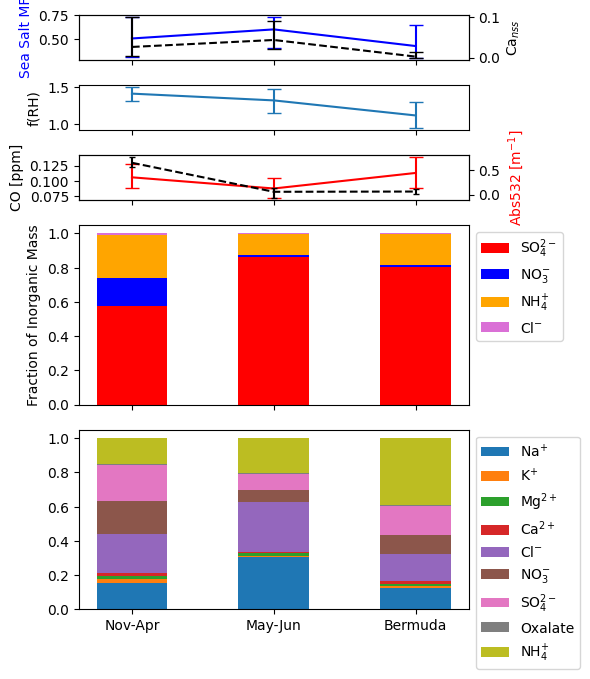

In [50]:

mpl.rcdefaults()
season = (
    "Nov-Apr",
    "May-Jun",
    "Bermuda",
)
weight_counts = {
    r"SO$_4^{2-}$": SO4,    # Sulfate ion
    r"NO$_3^{-}$": NO3,     # Nitrate ion
    r"NH$_4^{+}$": NH4,     # Ammonium ion
    r"Cl$^{-}$": Chl,       # Chloride ion (assuming Chl refers to chloride)
}

weight_counts = {
    r"SO$_4^{2-}$": SO4,    # Sulfate ion
    r"NO$_3^{-}$": NO3,     # Nitrate ion
    r"NH$_4^{+}$": NH4,     # Ammonium ion
    r"Cl$^{-}$": Chl,       # Chloride ion (assuming Chl refers to chloride)
}
width = 0.5  # Width of the bars
colors = ['red', 'blue', 'orange', 'orchid']  # Colors for each category

# Create the figure and axis
fig, axes = plt.subplots(5, figsize=(6,7), sharex=True, gridspec_kw={'height_ratios': [1, 1,1, 4, 4]})
x2 = axes[0].twinx()
axes[0].errorbar(season, SeaSalt.median(), yerr=[SeaSalt.median()-SeaSalt.quantile(.25),SeaSalt.quantile(.75)-SeaSalt.median()], capsize=5, label='Sea Salt', c='blue')
axes[0].set_ylabel('Sea Salt MF', c='blue')
x2.set_ylabel('Ca$_{nss}$', c='black')
x2.errorbar(season, Ca_nssmf.median(), yerr=[Ca_nssmf.median()-Ca_nssmf.quantile(.25),Ca_nssmf.quantile(.75)-Ca_nssmf.median()], capsize=5, label='Ca$_{nss}$', c='black', ls='--')
#axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

axes[1].errorbar(season, fRH.median(), yerr=[fRH.median()-fRH.quantile(.25),fRH.quantile(.75)-fRH.median()], capsize=5)
axes[1].set_ylabel('f(RH)')
bottom = np.zeros(len(season))  # Initialize the bottom values for stacking
ax2 = axes[2].twinx()
ax2.errorbar(season, abs532.median(), yerr=[abs532.median()-abs532.quantile(.25),abs532.quantile(.75)-abs532.median()], c='r', capsize=5)
ax2.set_ylabel('Abs532 [m$^{-1}$]', c='red')
axes[2].set_zorder(ax2.get_zorder() + 1)
axes[2].patch.set_visible(False)
axes[2].errorbar(season, CO.median(), yerr=[CO.median()-CO.quantile(.25),CO.quantile(.75)-CO.median()], capsize=2.5, color='black', ls='--')
axes[2].set_ylabel('CO [ppm]')
ax = axes[3]
# Plot each category as a stacked bar

for (boolean, weight_count), color in zip(weight_counts.items(), colors):
    p = ax.bar(season, weight_count, width, label=boolean, bottom=bottom, color=color)
    bottom += np.array(weight_count)  # Update the bottom for the next stack

# Add a legend outside the plot
ax.set_ylabel('Fraction of Inorganic Mass')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


ax = axes[4]

weight_counts2 = {
    r"Na$^{+}$": Na_mf,    # Sodium ion
    r"K$^{+}$": K_mf,      # Potassium ion
    r"Mg$^{2+}$": Mg_mf,   # Magnesium ion
    r"Ca$^{2+}$": Ca_mf,   # Magnesium ion
    r"Cl$^{-}$": Cl_mf,    # Chloride ion
    r"NO$_3^{-}$": NO3_mf, # Nitrate ion
    r"SO$_4^{2-}$": SO4_mf, # Sulfate ion
    r"Oxalate": Ox_mf,     # Oxalate
    r"NH$_4^{+}$": NH4_mf  # Ammonium ion
}
bottom2 = np.zeros(len(season))
for boolean, weight_count2 in weight_counts2.items():
    print(weight_count2)
    p = ax.bar(season, weight_count2, width, label=boolean, bottom=bottom2)
    bottom2 += np.array(weight_count2)  # Update the bottom for the next stack
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Display the plot
plt.tight_layout()
plt.savefig('../figures/CO_v_inorg_frac.png', dpi=300, bbox_inches='tight')

In [51]:
sd_col = ['SMPS_Bin02',
 'SMPS_Bin03',
 'SMPS_Bin04',
 'SMPS_Bin05',
 'SMPS_Bin06',
 'SMPS_Bin07',
 'SMPS_Bin08',
 'SMPS_Bin09',
 'SMPS_Bin10',
 'SMPS_Bin11',
 'SMPS_Bin12',
 'SMPS_Bin13',
 'SMPS_Bin14',
 'SMPS_Bin15',
 'SMPS_Bin16',
 'SMPS_Bin17',
 'SMPS_Bin18',
 'SMPS_Bin19',
 'SMPS_Bin20',
 'SMPS_Bin21',
 'SMPS_Bin22',
 'SMPS_Bin23',
 'SMPS_Bin24',
 'SMPS_Bin25',
 'SMPS_Bin26',
 'SMPS_Bin27',
 'SMPS_Bin28',
 'SMPS_Bin29',
 'SMPS_Bin30',
 'LAS_Bin01',
 'LAS_Bin02',
 'LAS_Bin03',
 'LAS_Bin04',
 'LAS_Bin05',
 'LAS_Bin06',
 'LAS_Bin07',
 'LAS_Bin08',
 'LAS_Bin09',
 'LAS_Bin10',
 'LAS_Bin11',
 'LAS_Bin12',
 'LAS_Bin13',
 'LAS_Bin14',
 'LAS_Bin15',
 'LAS_Bin16',
 'LAS_Bin17',
 'LAS_Bin18',
 'LAS_Bin19',
 'LAS_Bin20',
 'LAS_Bin21',
 'LAS_Bin22',
 'LAS_Bin23',
 'LAS_Bin24',
 'LAS_Bin25',
 'LAS_Bin26']
sd_mid = [
    3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1, 100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3
]

In [52]:
len(sd_mid), len(sd_col)

(55, 55)

In [53]:
len(d_seg)

4

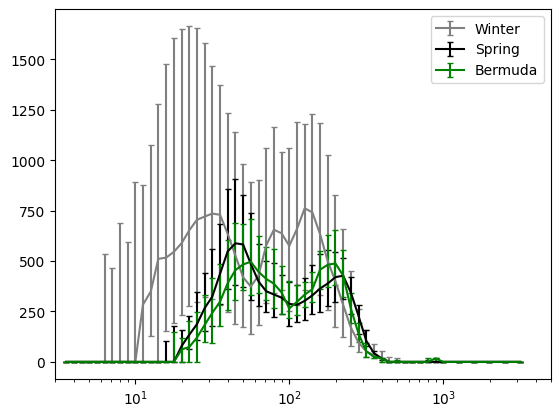

In [54]:
plt.style.use('tableau-colorblind10')
c=['gray', 'black', 'green']
plt.xlim([3,5000])
acc=0
for i in [0,1,3]:
    sd = d_seg[i].loc[d_seg[i]['OMF']<.3,sd_col]
    plt.errorbar(sd_mid, sd.median(), yerr=[sd.median() - sd.quantile(.25), sd.quantile(.75) - sd.median()], label=season2[i], capsize=2, c=c[acc])
    plt.xscale('log')
    #plt.yscale('log')
    plt.legend()
    acc+=1

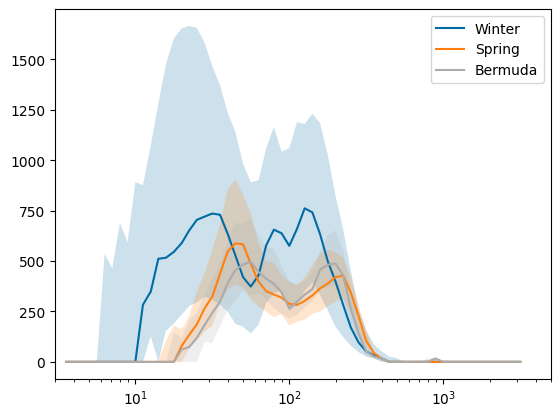

In [55]:
plt.xlim([3, 5000])
acc = 0

for i in [0, 1, 3]:
    sd = d_seg[i].loc[d_seg[i]['OMF'] < 0.3, sd_col]
    median = sd.median()
    q25 = sd.quantile(0.25)
    q75 = sd.quantile(0.75)
    
    # Plot the median line
    plt.plot(sd_mid, median, label=season2[i])
    
    # Fill the area between the 25th and 75th percentiles
    plt.fill_between(sd_mid, q25, q75, alpha=0.2)
    
    plt.xscale('log')
    # plt.yscale('log')
    plt.legend()
    acc += 1

In [56]:
lower_bounds = [3.36, 3.76, 4.22, 4.74, 5.32, 5.97, 6.69, 7.51, 8.43, 9.46, 10.6, 11.9, 13.4, 15.0, 16.8, 18.9, 21.2, 23.8, 26.7, 29.9, 33.6, 37.6, 42.2, 47.4, 53.2, 59.7, 66.9, 75.1, 84.3, 93.9, 106.1, 119.0, 133.6, 149.9, 168.2, 188.7, 211.7, 237.5, 266.5, 299.0, 335.5, 376.5, 422.4, 473.9, 531.8, 596.6, 669.5, 751.1, 842.8, 945.6, 1129.5, 1421.9, 1790.1, 2253.6, 2837.1]
upper_bounds = [3.76, 4.22, 4.74, 5.32, 5.97, 6.69, 7.51, 8.43, 9.46, 10.6, 11.9, 13.4, 15.0, 16.8, 18.9, 21.2, 23.8, 26.7, 29.9, 33.6, 37.6, 42.2, 47.4, 53.2, 59.7, 66.9, 75.1, 84.3, 94.0, 106.1, 119.0, 133.6, 149.9, 168.2, 188.7, 211.7, 237.5, 266.5, 299.0, 335.5, 376.5, 422.4, 473.9, 531.8, 596.6, 669.5, 751.1, 842.8, 945.6, 1129.5, 1421.9, 1790.1, 2253.6, 2837.1, 3487.5]

dlogd=[]
for i in range(0,len(lower_bounds)):
       dlogd.append(np.log10(upper_bounds[i]) - np.log10(lower_bounds[i]))
def calculate_effective_radius(radii, concentrations):
    # Ensure inputs are NumPy arrays
    radii = np.array(radii)
    concentrations = np.array(concentrations)
    numerator = np.sum(radii**3 * concentrations * dlogd)
    denominator = np.sum(np.pi * radii**2 * concentrations * dlogd)
    return numerator / denominator

In [57]:
def calc_above(Dp, sd):
    for i in range(0,len(sd)):
        if lower_bounds[i] == Dp:
            break
    return np.sum(np.array(sd[i:]) * np.array(dlogd[i:]))

0.033105713735252916
0.3886901617500748
0.3836271959368064


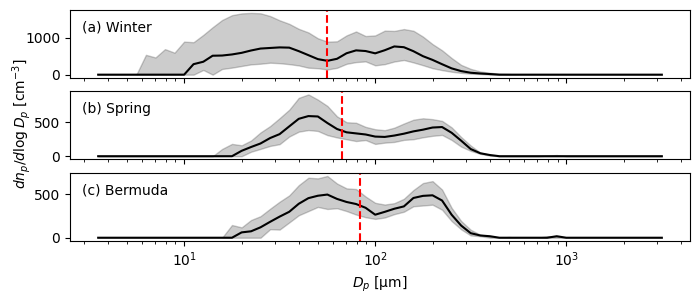

In [58]:
acc = 0
panel_labels = ['(a)', '(b)', '(c)']
fig,axes = plt.subplots(3, figsize=(8,3), sharex=True, sharey=False)
for i in [0, 1, 3]:
    ax=axes[acc]
    sd = d_seg[i].loc[d_seg[i]['OMF'] < 0.3, sd_col]
    median = sd.median()
    q25 = sd.quantile(0.25)
    q75 = sd.quantile(0.75)
    
    # Plot the median line
    ax.plot(sd_mid, median, label=season2[i], c='black')
    
    # Fill the area between the 25th and 75th percentiles
    ax.fill_between(sd_mid, q25, q75, alpha=0.2, color='black')
    #ax.grid(True, which="major", axis='x', ls="-", alpha=.5)
    # Calculate effective radius
    effective_radius = calculate_effective_radius(sd_mid, median)  # Assuming sd_mid is the radii and median is the concentration
    ax.axvline(effective_radius, color='red', linestyle='--', label=f'Effective Radius: {effective_radius:.2f} µm')
    ax.set_xscale('log')
    # plt.yscale('log')
    #plt.legend()
    ax.text(0.02, 0.85, panel_labels[acc] + ' ' + season2[i], transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')
    acc += 1
    print(calc_above(945.6, sd.mean()))
    axes[2].set_xlabel('$D_p$ [µm]')

fig.text(.05, 0.5, r'$dn_p/d\log D_p$ [cm$^{-3}$]', va='center', rotation='vertical')
plt.savefig('../figures/size_dist.png', dpi=300, bbox_inches='tight')

0.033105713735252916
0.3886901617500748
0.3836271959368064


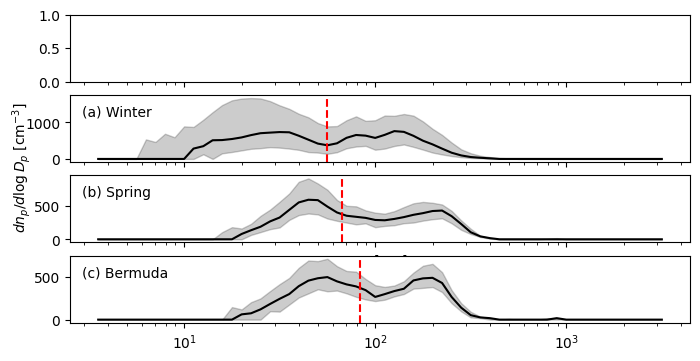

In [59]:
acc = 0
panel_labels = ['(a)', '(b)', '(c)']
fig,axes = plt.subplots(4, figsize=(8,4), sharex=True, sharey=False)
for i in [0, 1, 3]:
    ax=axes[acc+1]
    sd = d_seg[i].loc[d_seg[i]['OMF'] < 0.3, sd_col]
    median = sd.median()
    q25 = sd.quantile(0.25)
    q75 = sd.quantile(0.75)
    
    # Plot the median line
    ax.plot(sd_mid, median, label=season2[i], c='black')
    
    # Fill the area between the 25th and 75th percentiles
    ax.fill_between(sd_mid, q25, q75, alpha=0.2, color='black')
    #ax.grid(True, which="major", axis='x', ls="-", alpha=.5)
    # Calculate effective radius
    effective_radius = calculate_effective_radius(sd_mid, median)  # Assuming sd_mid is the radii and median is the concentration
    ax.axvline(effective_radius, color='red', linestyle='--', label=f'Effective Radius: {effective_radius:.2f} µm')
    ax.set_xscale('log')
    # plt.yscale('log')
    #plt.legend()
    ax.text(0.02, 0.85, panel_labels[acc] + ' ' + season2[i], transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')
    acc += 1
    print(calc_above(945.6, sd.mean()))
    axes[2].set_xlabel('$D_p$ [µm]')

fig.text(.05, 0.5, r'$dn_p/d\log D_p$ [cm$^{-3}$]', va='center', rotation='vertical')
plt.savefig('../figures/size_dist_w_bc.png', dpi=300, bbox_inches='tight')

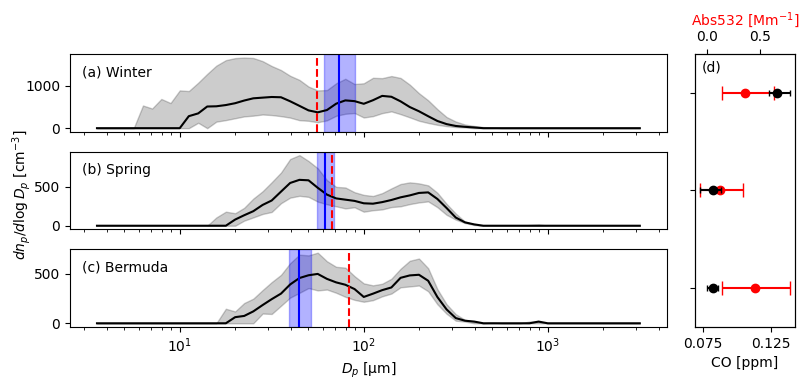

In [60]:
fig, axs = plt.subplot_mosaic([['(a)', '(d)'], ['(b)', '(d)'], ['(c)', '(d)']], width_ratios=[6,1],  figsize=(8,4))
'''
# Share x-axis only for panels a, b, and c
axs['(a)'].sharex(axs['(b)'])
axs['(b)'].sharex(axs['(c)'])
'''

for label, ax in axs.items():
    if ax == axs['(d)']:
        # Use Axes.annotate to put the label
        # - at the top left corner (axes fraction (0, 1)),
        # - offset half-a-fontsize right and half-a-fontsize down
        #   (offset fontsize (+0.5, -0.5)),
        # i.e. just inside the axes.
        ax.annotate(
            label,
            xy=(0, 1), xycoords='axes fraction',
            xytext=(+0.5, -0.5), textcoords='offset fontsize',
            fontsize='medium', verticalalignment='top')

acc=0
for i, a in zip([0, 1, 3], ['(a)', '(b)', '(c)']):
    ax=axs[a]
    sd = d_seg[i].loc[d_seg[i]['OMF'] < 0.3, sd_col] #  & (d_seg[i]['GPS_altitude']>3000)
    d_c = d_seg[i].loc[d_seg[i]['OMF'] < 0.3, 'D_a'].median()
    d_c25 = d_seg[i].loc[d_seg[i]['OMF'] < 0.3, 'D_a'].quantile(.25)
    d_c75 = d_seg[i].loc[d_seg[i]['OMF'] < 0.3, 'D_a'].quantile(.75)
    median = sd.median()
    q25 = sd.quantile(0.25)
    q75 = sd.quantile(0.75)
    
    # Plot the median line
    ax.plot(sd_mid, median, label=season2[i], c='black')
    
    # Fill the area between the 25th and 75th percentiles
    ax.fill_between(sd_mid, q25, q75, alpha=0.2, color='black')
    #ax.grid(True, which="major", axis='x', ls="-", alpha=.5)
    # Calculate effective radius
    effective_radius = calculate_effective_radius(sd_mid, median)  # Assuming sd_mid is the radii and median is the concentration
    ax.axvline(effective_radius, color='red', linestyle='--', label=f'Effective Radius: {effective_radius:.2f} µm')
    ax.axvline(d_c, color='blue', linestyle='-', label=f'Effective Radius: {effective_radius:.2f} µm')
    ax.axvspan(d_c25, d_c75, color='blue', alpha=0.3)
    ax.set_xscale('log')
    # plt.yscale('log')
    #plt.legend()
    ax.text(0.02, 0.85, panel_labels[acc] + ' ' + season2[i], transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')
    acc += 1

ax2 = axs['(d)'].twiny()
ax2.errorbar(abs532.median(), [2,1,0], xerr=[abs532.median()-abs532.quantile(.25),abs532.quantile(.75)-abs532.median()], c='r', capsize=5, fmt='o')
ax2.set_ylim([-.4, 2.4])
ax2.set_xlabel('Abs532 [Mm$^{-1}$]', c='red')
axs['(d)'].errorbar(CO.median(), [2,1,0], xerr=[CO.median()-CO.quantile(.25),CO.quantile(.75)-CO.median()], capsize=2.5, color='black', fmt='o')
axs['(d)'].set_zorder(ax2.get_zorder() + 1)
axs['(d)'].patch.set_visible(False)
#axs['(d)'].set_xlim([0.06, .15])
'''
ax2.errorbar(season, abs532.median(), yerr=[abs532.median()-abs532.quantile(.25),abs532.quantile(.75)-abs532.median()], c='r', capsize=5)
ax2.set_ylabel('Abs532 [m$^{-1}$]', c='red')
axes[2].set_zorder(ax2.get_zorder() + 1)
axes[2].patch.set_visible(False)
axes[2].errorbar(season, CO.median(), yerr=[CO.median()-CO.quantile(.25),CO.quantile(.75)-CO.median()], capsize=2.5, color='black', ls='--')
axes[2].set_ylabel('CO [ppm]')
'''

fig.text(0, 0.5, r'$dn_p/d\log D_p$ [cm$^{-3}$]', va='center', rotation='vertical')
axs['(c)'].set_xlabel('$D_p$ [µm]')
axs['(d)'].set_xlabel('CO [ppm]')
# Hide x-axis tick labels for panels a and b
axs['(a)'].set_xticklabels([])  # Hide labels for panel a
axs['(b)'].set_xticklabels([])  # Hide labels for panel b
axs['(d)'].set_yticks([0,1,2])
axs['(d)'].set_xticks([.075,.125])
axs['(d)'].set_yticklabels([])  # Hide labels for panel b
fig.tight_layout()
fig.savefig('../figures/size_dist_w_bc.png', dpi=300, bbox_inches='tight')

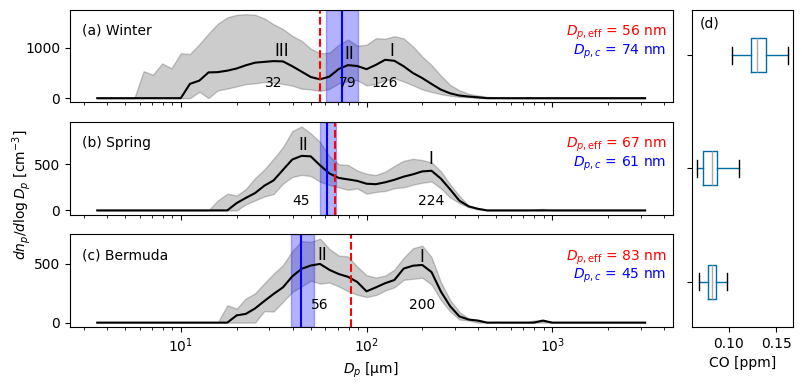

In [61]:
panel_labels = ['(a)', '(b)', '(c)', '(d)']
fig, axs = plt.subplot_mosaic([['(a)', '(d)'], ['(b)', '(d)'], ['(c)', '(d)']], width_ratios=[6,1],  figsize=(8,4))
'''
# Share x-axis only for panels a, b, and c
axs['(a)'].sharex(axs['(b)'])
axs['(b)'].sharex(axs['(c)'])
'''

for label, ax in axs.items():
    if ax == axs['(d)']:
        # Use Axes.annotate to put the label
        # - at the top left corner (axes fraction (0, 1)),
        # - offset half-a-fontsize right and half-a-fontsize down
        #   (offset fontsize (+0.5, -0.5)),
        # i.e. just inside the axes.
        ax.annotate(
            label,
            xy=(0, 1), xycoords='axes fraction',
            xytext=(+0.5, -0.5), textcoords='offset fontsize',
            fontsize='medium', verticalalignment='top')

acc=0
for i, a in zip([0, 1, 3], ['(a)', '(b)', '(c)']):
    ax=axs[a]
    sd = d_seg[i].loc[d_seg[i]['OMF'] < 0.3, sd_col] #  & (d_seg[i]['GPS_altitude']>3000)
    d_c = d_seg[i].loc[d_seg[i]['OMF'] < 0.3, 'D_a'].median()
    d_c25 = d_seg[i].loc[d_seg[i]['OMF'] < 0.3, 'D_a'].quantile(.25)
    d_c75 = d_seg[i].loc[d_seg[i]['OMF'] < 0.3, 'D_a'].quantile(.75)
    median = sd.median()
    q25 = sd.quantile(0.25)
    q75 = sd.quantile(0.75)

    top_three_indices = sd.median().nlargest(10).index
    column_positions = [sd.columns.get_loc(col) for col in top_three_indices]

    if i == 0:
        m_j = 3
    else:
        m_j = 2
    
    y_pos = [300, 100, 150]
    for j in range(m_j):
        if acc == 1 and j == 1:
            j = 5
        elif acc == 0 and j == 1:
            j = 2
        elif acc == 0 and j == 2:
            j = 7
        ax.text(sd_mid[column_positions[j]], y_pos[acc], str(int(round(sd_mid[column_positions[j]],0))), verticalalignment='center', horizontalalignment='center')
        
    #print(sd.median().nlargest(3))
    # Plot the median line
    ax.plot(sd_mid, median, label=season2[i], c='black')
    
    # Fill the area between the 25th and 75th percentiles
    ax.fill_between(sd_mid, q25, q75, alpha=0.2, color='black')
    #ax.grid(True, which="major", axis='x', ls="-", alpha=.5)
    # Calculate effective radius
    effective_radius = calculate_effective_radius(sd_mid, median)  # Assuming sd_mid is the radii and median is the concentration
    ax.axvline(effective_radius, color='red', linestyle='--', label=f'Effective Radius: {effective_radius:.2f} µm')
    ax.axvline(d_c, color='blue', linestyle='-', label=f'Effective Radius: {effective_radius:.2f} µm')
    ax.axvspan(d_c25, d_c75, color='blue', alpha=0.3)
    ax.set_xscale('log')
    # plt.yscale('log')
    #plt.legend()
    ax.text(0.02, 0.85, panel_labels[acc] + ' ' + season2[i], transform = ax.transAxes,
         verticalalignment = 'top', horizontalalignment = 'left')
    
    ax.text(0.99, .85, r'$D_{p,\rm eff}$ = ' + str(int(round(effective_radius,0)))+ ' nm', transform = ax.transAxes,
         verticalalignment = 'top', horizontalalignment = 'right', c='r')
    ax.text(0.99, .65, r'$D_{p,c}$ = ' + str(int(round(d_c,0))) + ' nm', transform = ax.transAxes,
         verticalalignment = 'top', horizontalalignment = 'right', c='b')
    
    acc += 1
'''
ax2 = axs['(d)'].twiny()
ax2.errorbar(abs532.median(), [2,1,0], xerr=[abs532.median()-abs532.quantile(.25),abs532.quantile(.75)-abs532.median()], c='r', capsize=5, fmt='o')
ax2.set_ylim([-.4, 2.4])
ax2.set_xlabel('Abs532 [Mm$^{-1}$]', c='red')
'''
#axs['(d)'].errorbar(CO.median(), [2,1,0], xerr=[CO.median()-CO.quantile(.25),CO.quantile(.75)-CO.median()], capsize=2.5, color='black', fmt='o')
#axs['(d)'].boxplot(np.array(CO), positions=[2, 1, 0], vert=False)
CO.boxplot(vert=False, positions=[2, 1, 0], grid=False, ax=axs['(d)'], showfliers=False)
axs['(d)'].set_ylim([-.4, 2.4])
#axs['(d)'].set_zorder(ax2.get_zorder() + 1)
axs['(d)'].patch.set_visible(False)
#axs['(d)'].set_xlim([0.06, .15])
'''
ax2.errorbar(season, abs532.median(), yerr=[abs532.median()-abs532.quantile(.25),abs532.quantile(.75)-abs532.median()], c='r', capsize=5)
ax2.set_ylabel('Abs532 [m$^{-1}$]', c='red')
axes[2].set_zorder(ax2.get_zorder() + 1)
axes[2].patch.set_visible(False)
axes[2].errorbar(season, CO.median(), yerr=[CO.median()-CO.quantile(.25),CO.quantile(.75)-CO.median()], capsize=2.5, color='black', ls='--')
axes[2].set_ylabel('CO [ppm]')
'''

fig.text(0, 0.5, r'$dn_p/d\log D_p$ [cm$^{-3}$]', va='center', rotation='vertical')
axs['(c)'].set_xlabel('$D_p$ [µm]')
axs['(d)'].set_xlabel('CO [ppm]')
# Hide x-axis tick labels for panels a and b
axs['(a)'].set_xticklabels([])  # Hide labels for panel a
axs['(b)'].set_xticklabels([])  # Hide labels for panel b
#axs['(d)'].set_yticks([0,1,2])
#axs['(d)'].set_xticks([.075,.125])
axs['(d)'].set_yticklabels([])  # Hide labels for panel b


# annotate the peaks

axs['(a)'].text(0.53, 0.65, 'I', transform=axs['(a)'].transAxes,
         verticalalignment='top', horizontalalignment='left', fontsize=12)
axs['(a)'].text(0.455, 0.62, 'II', transform=axs['(a)'].transAxes,
         verticalalignment='top', horizontalalignment='left', fontsize=12)
axs['(a)'].text(0.34, 0.65, 'III', transform=axs['(a)'].transAxes,
         verticalalignment='top', horizontalalignment='left', fontsize=12)
         
axs['(b)'].text(0.595, 0.7, 'I', transform=axs['(b)'].transAxes,
         verticalalignment='top', horizontalalignment='left', fontsize=12)
axs['(b)'].text(0.38, 0.85, 'II', transform=axs['(b)'].transAxes,
         verticalalignment='top', horizontalalignment='left', fontsize=12)

axs['(c)'].text(0.58, 0.85, 'I', transform=axs['(c)'].transAxes,
         verticalalignment='top', horizontalalignment='left', fontsize=12)
axs['(c)'].text(0.41, 0.87, 'II', transform=axs['(c)'].transAxes,
         verticalalignment='top', horizontalalignment='left', fontsize=12)

fig.tight_layout()
fig.savefig('../figures/size_dist_w_CO.png', dpi=300, bbox_inches='tight')

In [62]:
column_positions

[24, 35, 23, 34, 33, 22, 25, 36, 26, 21]

In [63]:
sd_mid[-1]

3162.3

In [64]:
sd_mid[column_positions[0]]

56.2

In [65]:
d_seg[3].loc[(d_seg[3]['OMF'] < 0.3) & (d_seg[3]['GPS_altitude']>4000)]

,Unnamed: 0.1,level_0,Unnamed: 0,index,Time_Mid,SMPS_Bin01,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,...,D_c,CCN_n_pred,non_org,Org_vc,non_org_vc,ams_tot_vc,k,inorg_tot,OMF,OMF_range
12674,12674,15738,25132,25132,2022-06-10 19:45:50.500,NaN,NaN,NaN,NaN,NaN,...,66.559742,NaN,0.269,0.000064,0.000192,0.000257,0.384561,0.269,0.297650,0.2-0.3
12680,12680,15745,25141,25141,2022-06-10 19:54:50.500,NaN,NaN,0.0,872.27,2563.75,...,64.959824,981.092520,0.334,0.000050,0.000239,0.000289,0.413820,0.334,0.210402,0.2-0.3
12865,12865,15944,25396,25396,2022-06-11 15:42:54.500,NaN,NaN,0.0,4096.52,0.00,...,65.962828,677.516879,0.501,0.000103,0.000358,0.000461,0.395146,0.501,0.266471,0.2-0.3
13267,13267,16372,26010,26010,2022-06-13 20:09:23.500,NaN,NaN,NaN,0.00,1651.84,...,64.480146,860.849419,0.441,0.000055,0.000315,0.000370,0.423165,0.441,0.181818,0.1-0.2
13304,13304,16411,26055,26055,2022-06-14 14:07:32.500,NaN,NaN,NaN,0.00,0.00,...,63.591958,582.114262,0.195,0.000016,0.000139,0.000155,0.441224,0.195,0.125561,0.1-0.2
13310,13310,16417,26063,26063,2022-06-14 14:15:32.500,NaN,NaN,NaN,4750.13,1482.00,...,65.704308,1083.501383,0.244,0.000031,0.000174,0.000205,0.422474,0.244,0.183946,0.1-0.2


In [66]:
sd.quantile(.95) - sd.median()

SMPS_Bin02      0.0000
SMPS_Bin03      0.0000
SMPS_Bin04      0.0000
SMPS_Bin05      0.0000
SMPS_Bin06      0.0000
SMPS_Bin07      0.0000
SMPS_Bin08      0.0000
SMPS_Bin09      0.0000
SMPS_Bin10    226.0370
SMPS_Bin11      0.0000
SMPS_Bin12    322.2500
SMPS_Bin13    397.6340
SMPS_Bin14    362.8440
SMPS_Bin15    447.2110
SMPS_Bin16    597.4960
SMPS_Bin17    437.6750
SMPS_Bin18    572.0520
SMPS_Bin19    651.3400
SMPS_Bin20    564.8060
SMPS_Bin21    814.3130
SMPS_Bin22    822.2330
SMPS_Bin23    773.8120
SMPS_Bin24    953.9600
SMPS_Bin25    770.2280
SMPS_Bin26    909.3530
SMPS_Bin27    690.9490
SMPS_Bin28    705.4930
SMPS_Bin29    695.1970
SMPS_Bin30    542.8620
LAS_Bin01     576.6700
LAS_Bin02     465.2350
LAS_Bin03     411.8450
LAS_Bin04     377.7825
LAS_Bin05     296.7225
LAS_Bin06     297.7250
LAS_Bin07     334.2575
LAS_Bin08     250.0075
LAS_Bin09     158.4650
LAS_Bin10      96.7050
LAS_Bin11      77.9200
LAS_Bin12      26.1725
LAS_Bin13      17.2025
LAS_Bin14      19.4025
LAS_Bin15  

In [67]:
sd = d_seg[0].loc[d_seg[0]['OMF']<.3,sd_col]
sd.median() - sd.quantile(.05)
sd.quantile(.95) - sd.median()

SMPS_Bin02    2488.83200
SMPS_Bin03    2664.10850
SMPS_Bin04    3372.59400
SMPS_Bin05    4797.29050
SMPS_Bin06    4657.40850
SMPS_Bin07    4858.02200
SMPS_Bin08    5168.79300
SMPS_Bin09    5300.34700
SMPS_Bin10    4880.78100
SMPS_Bin11    3806.19400
SMPS_Bin12    3824.65300
SMPS_Bin13    3993.95200
SMPS_Bin14    4033.83050
SMPS_Bin15    3624.34900
SMPS_Bin16    3841.75800
SMPS_Bin17    3692.14600
SMPS_Bin18    3939.88300
SMPS_Bin19    4081.41600
SMPS_Bin20    3959.56800
SMPS_Bin21    3592.24250
SMPS_Bin22    3216.60000
SMPS_Bin23    3199.28350
SMPS_Bin24    3002.08650
SMPS_Bin25    2860.46600
SMPS_Bin26    2430.61900
SMPS_Bin27    2258.06300
SMPS_Bin28    2115.80850
SMPS_Bin29    1658.09400
SMPS_Bin30    1481.31700
LAS_Bin01     1514.54025
LAS_Bin02     1388.28275
LAS_Bin03     1280.69475
LAS_Bin04     1203.34750
LAS_Bin05     1216.50825
LAS_Bin06     1195.38800
LAS_Bin07     1148.77150
LAS_Bin08      994.56625
LAS_Bin09      703.22450
LAS_Bin10      581.42300
LAS_Bin11      342.46150


In [68]:
weight_counts2

{'Na$^{+}$': [np.float64(0.15359698291219356),
  np.float64(0.3065801882559959),
  np.float64(0.12621529658111735)],
 'K$^{+}$': [np.float64(0.023966844164933755),
  np.float64(0.006870184571904106),
  np.float64(0.007338337079383048)],
 'Mg$^{2+}$': [np.float64(0.01609309180674984),
  np.float64(0.015682907040147607),
  np.float64(0.011431467875733682)],
 'Ca$^{2+}$': [np.float64(0.018126402360891452),
  np.float64(0.007967786293297564),
  np.float64(0.018572251893695792)],
 'Cl$^{-}$': [np.float64(0.23116020420209987),
  np.float64(0.2889820997705628),
  np.float64(0.15840090142180757)],
 'NO$_3^{-}$': [np.float64(0.19056354744531612),
  np.float64(0.06976865302431794),
  np.float64(0.11063032229003913)],
 'SO$_4^{2-}$': [np.float64(0.21236489410752638),
  np.float64(0.0964139723173465),
  np.float64(0.17335716196357195)],
 'Oxalate': [np.float64(0.0037136641141008093),
  np.float64(0.0054106201839895195),
  np.float64(0.0018900159560011026)],
 'NH$_4^{+}$': [np.float64(0.15041436888

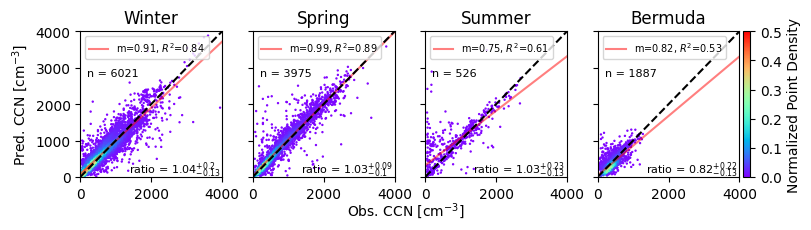

In [69]:
sub_m2 = d.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
# Define the data
x = sub_m2['N_CCN_stdPT']
y = sub_m2['CCN_n_pred']
mask = ~np.isnan(x) & ~np.isnan(y)
num_points = np.sum(mask)

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

z_max = z.max()

fig, axes = plt.subplots(1,4, figsize=(8,2), sharey=True, sharex=True, constrained_layout=True)
ax_min,ax_max = 0,4000
season2 = ['Winter', 'Spring', 'Summer', 'Bermuda']
for i in range(0,4):
    ax = axes[i]
    p_d = d_seg[i].dropna(subset=['N_CCN_stdPT', 'CCN_n_pred']) # panel data


    # Calculate point density
    xy = np.vstack([p_d['N_CCN_stdPT'], p_d['CCN_n_pred']])
    z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

    slope, intercept, r_value, p_value, std_err = linregress(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'])

    fit_line = slope * np.linspace(ax_min,ax_max) + intercept
    ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label=f'm={slope:.2f}, $R^2$={r_value**2:.2f}', alpha=.5, ls='-')
    ax.plot(np.linspace(ax_min,ax_max), np.linspace(ax_min,ax_max), c='black', alpha=1, ls='--')
    ax.legend(fontsize=7, loc='upper left')
    # plot data
    scatter = ax.scatter(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'], s=0.5, c=z/z_max, cmap='rainbow', vmin=0, vmax=.5)

    ratio = p_d['CCN_n_pred']/p_d['N_CCN_stdPT']

    lower = round(ratio.quantile(.25) - ratio.median(),2)
    upper = round(ratio.quantile(.75) - ratio.median(),2)

    ax.text(0.05, 0.75, f"n = {len(p_d['N_CCN_stdPT'])}",
         fontsize=8, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')
    ax.text(0.99, 0.12, f"ratio = {round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$",
         fontsize=8, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='right')

    # add labels
    ax.set_title(season2[i])
fig.colorbar(scatter, ax=ax, orientation='vertical', label='Normalized Point Density', pad=-.1)
ax.set_xlim([ax_min,ax_max])
ax.set_ylim([ax_min,ax_max])
axes[0].set_ylabel('Pred. CCN [cm$^{-3}$]')
fig.text(0.5, -0.05, 'Obs. CCN [cm$^{-3}$]', ha='center')
plt.savefig('../figures/seasons_all2.png', dpi=300, bbox_inches='tight')

np.float64(0.07432113523820078)

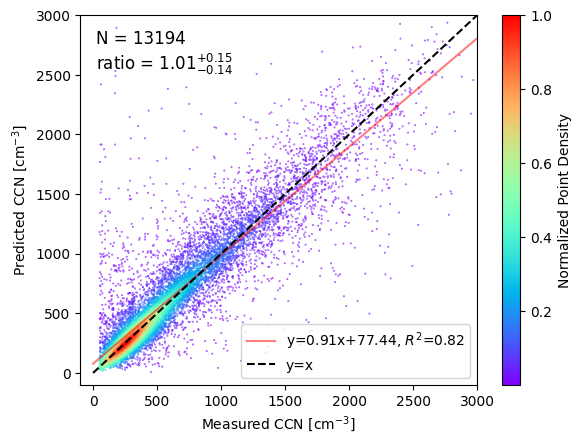

In [70]:
sub_m2 = d.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
# Define the data
x = sub_m2['N_CCN_stdPT']
y = sub_m2['CCN_n_pred']
mask = ~np.isnan(x) & ~np.isnan(y)
num_points = np.sum(mask)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the line of best fit
fit_line = slope * np.linspace(0, x.max()) + intercept

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

# Plot the data and best fit line
plt.plot(np.linspace(0, x.max()), fit_line, c='r', label=f'y={slope:.2f}x+{intercept:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
plt.plot(np.linspace(0, x.max()), np.linspace(0, x.max()), c='black', ls='--', label='y=x')
plt.scatter(x, y, s=0.1, alpha=1, c=z/z_max, cmap='rainbow')#, vmin=0, vmax=0.07)

#plt.xlim([-100, x.max()])
#plt.ylim([-100, x.max()])
plt.xlim([-100, 3000])
plt.ylim([-100, 3000])
plt.ylabel('Predicted CCN [cm$^{-3}$]')
plt.xlabel('Measured CCN [cm$^{-3}$]')
plt.colorbar(label='Normalized Point Density')

ratio = sub_m2['CCN_n_pred']/sub_m2['N_CCN_stdPT']

lower = round(ratio.quantile(.25) - ratio.median(),2)
upper = round(ratio.quantile(.75) - ratio.median(),2)

plt.text(0.15, 0.85, f"N = {num_points}\nratio = {round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$",
         fontsize=12, transform=plt.gcf().transFigure,
         verticalalignment='top', horizontalalignment='left')

plt.legend(loc='lower right')
plt.savefig('../figures/closure_all_non_org_cbar2.png', dpi=300, bbox_inches='tight')
z.max()

np.float64(0.07432113523820078)

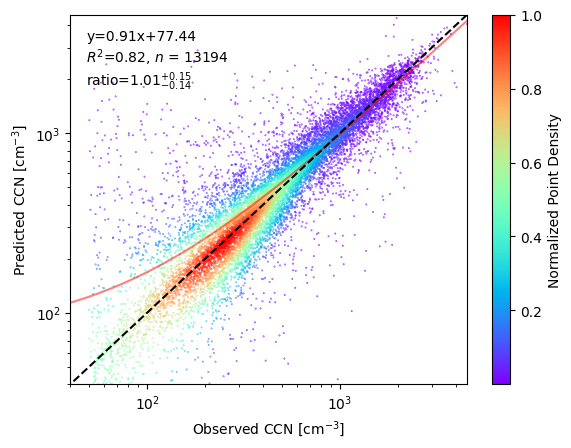

In [71]:
sub_m2 = d.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
# Define the data
x = sub_m2['N_CCN_stdPT']
y = sub_m2['CCN_n_pred']
mask = ~np.isnan(x) & ~np.isnan(y)
num_points = np.sum(mask)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the line of best fit
fit_line = slope * np.linspace(0, x.max(), num=1000) + intercept

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

# Plot the data and best fit line
plt.plot(np.linspace(0, x.max(), num=1000), fit_line, c='r', label=f'y={slope:.2f}x+{intercept:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
plt.plot(np.linspace(0, x.max()), np.linspace(0, x.max()), c='black', ls='--', label='y=x')
plt.scatter(x, y, s=0.1, alpha=1, c=z/z_max, cmap='rainbow')#, vmin=0, vmax=0.07)

#plt.xlim([-100, x.max()])
#plt.ylim([-100, x.max()])
plt.xlim([40, x.max()])
plt.ylim([40, x.max()])
plt.ylabel('Predicted CCN [cm$^{-3}$]')
plt.xlabel('Observed CCN [cm$^{-3}$]')
plt.colorbar(label='Normalized Point Density')

ratio = sub_m2['CCN_n_pred']/sub_m2['N_CCN_stdPT']

lower = round(ratio.quantile(.25) - ratio.median(),2)
upper = round(ratio.quantile(.75) - ratio.median(),2)

plt.text(0.15, 0.85, f"y={slope:.2f}x+{intercept:.2f}\n$R^2$={r_value**2:.2f}, $n$ = {num_points}\nratio={round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$", transform=plt.gcf().transFigure,
          verticalalignment='top', horizontalalignment='left')
'''
plt.text(0.15, 0.85, f"N = {num_points}\nratio = {round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$",
         fontsize=12, transform=plt.gcf().transFigure,
         verticalalignment='top', horizontalalignment='left')
'''
#plt.legend(loc='lower right')
plt.xscale('log')
plt.yscale('log')
plt.savefig('../figures/closure_all_non_org_cbar2.png', dpi=300, bbox_inches='tight')
z.max()

np.float64(0.07432113523820078)

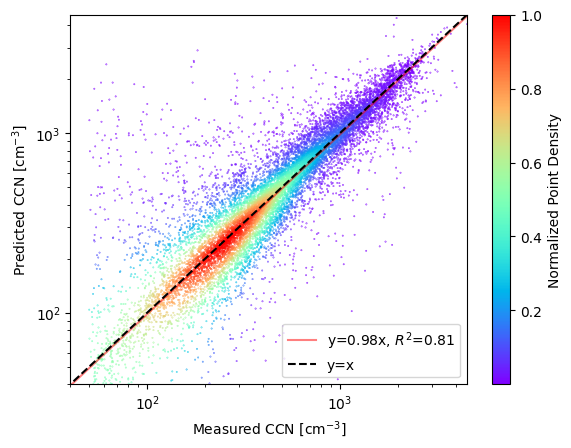

In [72]:
sub_m2 = d.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
# Define the data
x = sub_m2['N_CCN_stdPT']
y = sub_m2['CCN_n_pred']
mask = ~np.isnan(x) & ~np.isnan(y)
num_points = np.sum(mask)

model = LinearRegression(fit_intercept=False)
model.fit(x.values.reshape(-1,1), y.values.reshape(-1,1))
slope = model.coef_[0][0]
r_value = model.score(x.values.reshape(-1,1), y.values.reshape(-1,1))

# Perform linear regression
#slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the line of best fit
fit_line = slope * np.linspace(0, x.max())

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

# Plot the data and best fit line
plt.plot(np.linspace(0, x.max()), fit_line, c='r', label=f'y={slope:.2f}x, $R^2$={r_value:.2f}', alpha=.5)
plt.plot(np.linspace(0, x.max()), np.linspace(0, x.max()), c='black', ls='--', label='y=x')
plt.scatter(x, y, s=0.1, alpha=1, c=z/z_max, cmap='rainbow')#, vmin=0, vmax=0.07)

plt.xlim([40, x.max()])
plt.ylim([40, x.max()])
#plt.xlim([-100, 3000])
#plt.ylim([-100, 3000])
plt.ylabel('Predicted CCN [cm$^{-3}$]')
plt.xlabel('Measured CCN [cm$^{-3}$]')
plt.colorbar(label='Normalized Point Density')

'''
ratio = sub_m2['CCN_n_pred']/sub_m2['N_CCN_stdPT']

lower = round(ratio.quantile(.25) - ratio.median(),2)
upper = round(ratio.quantile(.75) - ratio.median(),2)

plt.text(0.15, 0.85, f"N = {num_points}\nratio = {round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$",
         fontsize=12, transform=plt.gcf().transFigure,
         verticalalignment='top', horizontalalignment='left')
'''

#plt.text(0.15, 0.85, f'y={slope:.2f}x, $R^2$={r_value:.2f}', fontsize=12, transform=plt.gcf().transFigure, verticalalignment='top', horizontalalignment='left')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right')
plt.savefig('../figures/closure_all_non_org_cbar3.png', dpi=300, bbox_inches='tight')
z.max()

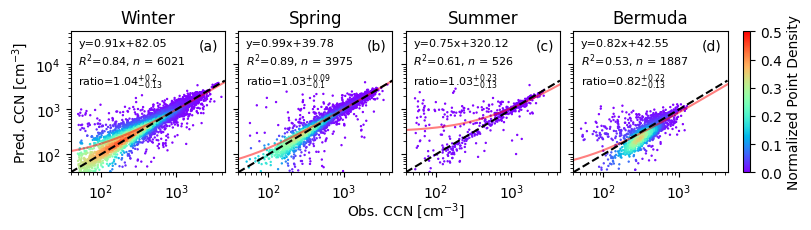

In [73]:
sub_m2 = d.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
# Define the data
x = sub_m2['N_CCN_stdPT']
y = sub_m2['CCN_n_pred']
mask = ~np.isnan(x) & ~np.isnan(y)
num_points = np.sum(mask)

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

z_max = z.max()

fig, axes = plt.subplots(1,4, figsize=(8,2), sharey=True, sharex=True, constrained_layout=True)
ax_min,ax_max = 40,sub_m2['CCN_n_pred'].max()
season2 = ['Winter', 'Spring', 'Summer', 'Bermuda']
for i in range(0,4):
     ax = axes[i]
     p_d = d_seg[i].dropna(subset=['N_CCN_stdPT', 'CCN_n_pred']) # panel data

     x,y = p_d['N_CCN_stdPT'], p_d['CCN_n_pred']


     # Calculate point density
     xy = np.vstack([x,y])
     z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

     slope, intercept, r_value, p_value, std_err = linregress(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'])

     '''
     model = LinearRegression(fit_intercept=True)
     model.fit(x.values.reshape(-1,1), y.values.reshape(-1,1))
     slope = model.coef_[0][0]
     r_value = model.score(x.values.reshape(-1,1), y.values.reshape(-1,1))
     '''

     fit_line = slope * np.linspace(ax_min,ax_max, num=1000) + intercept
     ax.plot(np.linspace(ax_min,ax_max, num=1000), fit_line, c='r', label=f'{slope:.2f}x+{intercept:.2f} , $R^2$={r_value**2:.2f}', alpha=.5, ls='-')
     ax.plot(np.linspace(ax_min,ax_max), np.linspace(ax_min,ax_max), c='black', alpha=1, ls='--')
     #ax.legend(fontsize=7, loc='upper left')
     # plot data
     scatter = ax.scatter(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'], s=0.5, c=z/z_max, cmap='rainbow', vmin=0, vmax=.5)

     ratio = p_d['CCN_n_pred']/p_d['N_CCN_stdPT']

     lower = round(ratio.quantile(.25) - ratio.median(),2)
     upper = round(ratio.quantile(.75) - ratio.median(),2)

     ax.text(0.05, 0.95, f"y={slope:.2f}x+{intercept:.2f}\n$R^2$={r_value**2:.2f}, $n$ = {len(p_d['N_CCN_stdPT'])}\nratio={round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$",
          fontsize=8, transform=ax.transAxes,
          verticalalignment='top', horizontalalignment='left')
     #ax.text(0.99, 0.12, f"ratio = {round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$", fontsize=8, transform=ax.transAxes, verticalalignment='top', horizontalalignment='right')

     ax.text(0.96, 0.95, '(' + chr(97+i) + ')',
            fontsize=10, transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='right')
            
     # add labels
     ax.set_title(season2[i])
     ax.set_xscale('log')
     ax.set_yscale('log')
fig.colorbar(scatter, ax=ax, orientation='vertical', label='Normalized Point Density', pad=.1)
ax.set_xlim([ax_min,ax_max])
ax.set_ylim([ax_min,ax_max+50000])
axes[0].set_ylabel('Pred. CCN [cm$^{-3}$]')
fig.text(0.5, -0.05, 'Obs. CCN [cm$^{-3}$]', ha='center')
plt.savefig('../figures/seasons_all2.png', dpi=300, bbox_inches='tight')

In [74]:
d_all = pd.read_csv('../tables/merged_with_opt.csv', parse_dates=['Time_Mid'])

In [75]:
d_all[d_all['Time_Mid'].dt.month == 9]

,Time_Mid,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,SMPS_Bin06,SMPS_Bin07,SMPS_Bin08,SMPS_Bin09,SMPS_Bin10,...,Wind_Speed,Wind_Direction,LWC_FCDP,ED-liquid_2DS,Ice_Flag_2DS,CO_ppm,Abs470_total,Abs532_total,Abs660_total,fRH550_RH20to80
5715,2020-09-02 15:25:17.500,0.00,0.00,0.00,1279.18,1628.5,723.66,1321.46,0.00,1575.96,...,6.510,234.440,0.0,0.000046,NaN,0.13175,1.210,1.220,1.170,NaN
5716,2020-09-02 15:26:17.500,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,9.440,230.570,0.0,0.000000,NaN,0.12540,0.110,0.380,0.525,NaN
5717,2020-09-02 15:27:17.500,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,10.810,259.185,0.0,0.000000,NaN,0.12230,0.315,0.930,0.640,NaN
5718,2020-09-02 15:28:17.500,NaN,0.00,0.00,69824.31,0.0,0.00,0.00,0.00,0.00,...,11.660,257.695,0.0,0.000000,NaN,0.11940,0.440,0.670,0.425,NaN
5719,2020-09-02 15:29:17.500,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,12.585,252.435,0.0,0.000000,NaN,0.11745,0.220,0.445,0.540,1.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2020-09-30 19:27:03.500,3141.51,0.00,0.00,977.73,0.0,539.27,1262.18,0.00,837.12,...,7.290,253.910,0.0,NaN,NaN,0.13540,0.330,0.350,0.465,1.260
7902,2020-09-30 19:28:03.500,0.00,0.00,0.00,0.00,0.0,0.00,400.70,0.00,0.00,...,7.920,245.915,0.0,NaN,NaN,0.13240,0.855,0.485,0.290,1.320
7903,2020-09-30 19:29:03.500,0.00,0.00,0.00,0.00,0.0,0.00,465.89,2833.95,1164.15,...,7.360,249.125,0.0,NaN,NaN,0.13370,0.690,0.485,0.605,1.390
7904,2020-09-30 19:30:03.500,2462.30,2639.46,1088.49,0.00,0.0,0.00,401.49,475.05,1015.33,...,6.275,254.455,0.0,NaN,NaN,0.13370,0.765,0.560,0.455,1.440


In [76]:
d_seg[-2]

,Unnamed: 0.1,level_0,Unnamed: 0,index,Time_Mid,SMPS_Bin01,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,...,D_c,CCN_n_pred,non_org,Org_vc,non_org_vc,ams_tot_vc,k,inorg_tot,OMF,OMF_range
1845,1845,2542,3324,3324,2020-08-13 14:06:01.500,NaN,NaN,NaN,NaN,NaN,...,45.051894,NaN,1.684,0.000509,0.001203,0.001712,0.366961,1.684,0.348549,0.3-0.4
1846,1846,2545,3327,3327,2020-08-13 14:09:01.500,NaN,NaN,NaN,NaN,NaN,...,61.838660,NaN,0.842,0.000021,0.000601,0.000622,0.467229,0.842,0.042093,0.0-0.1
1847,1847,2547,3329,3329,2020-08-13 14:11:01.500,NaN,NaN,NaN,NaN,NaN,...,61.193325,NaN,0.449,0.000309,0.000321,0.000630,0.293469,0.449,0.549197,0.5-0.6
1848,1848,2549,3331,3331,2020-08-13 14:13:01.500,NaN,NaN,NaN,NaN,NaN,...,53.782837,NaN,1.514,0.000573,0.001081,0.001655,0.348359,1.514,0.401108,0.4-0.5
1849,1849,2550,3332,3332,2020-08-13 14:14:01.500,NaN,NaN,NaN,NaN,NaN,...,108.895175,220.317086,1.453,0.000417,0.001038,0.001455,0.371048,1.453,0.336832,0.3-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,2432,3417,4561,4561,2020-08-28 19:51:18.500,NaN,NaN,0.0,0.0,1303.18,...,74.267011,202.225075,1.485,0.000432,0.001061,0.001493,0.370047,1.485,0.339707,0.3-0.4
2433,2433,3419,4563,4563,2020-08-28 19:53:18.500,NaN,NaN,0.0,0.0,0.00,...,64.470617,274.794809,0.851,0.000159,0.000608,0.000767,0.401271,0.851,0.248233,0.2-0.3
2434,2434,3422,4567,4567,2020-08-28 19:57:18.500,NaN,NaN,0.0,0.0,0.00,...,51.262213,404.447415,1.056,0.000217,0.000754,0.000971,0.395252,1.056,0.266157,0.2-0.3
2435,2435,3423,4568,4568,2020-08-28 19:58:18.500,NaN,NaN,0.0,0.0,0.00,...,99.874399,204.565391,1.517,0.000542,0.001084,0.001626,0.353282,1.517,0.387318,0.3-0.4


(0.0, 3.0)

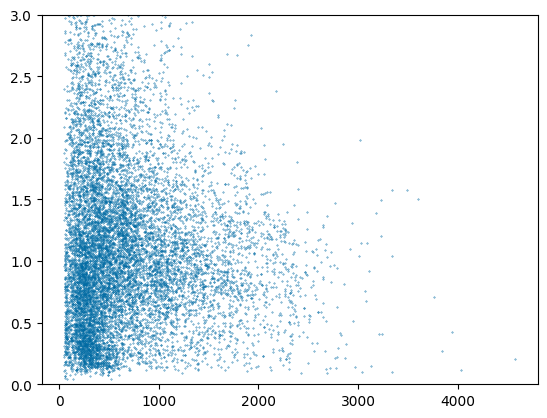

In [77]:
plt.scatter(d['N_CCN_stdPT'], d['k']/d['k_obs'], s=.1)
plt.ylim([0,3])

In [78]:
list(d.keys())

['Unnamed: 0.1',
 'level_0',
 'Unnamed: 0',
 'index',
 'Time_Mid',
 'SMPS_Bin01',
 'SMPS_Bin02',
 'SMPS_Bin03',
 'SMPS_Bin04',
 'SMPS_Bin05',
 'SMPS_Bin06',
 'SMPS_Bin07',
 'SMPS_Bin08',
 'SMPS_Bin09',
 'SMPS_Bin10',
 'SMPS_Bin11',
 'SMPS_Bin12',
 'SMPS_Bin13',
 'SMPS_Bin14',
 'SMPS_Bin15',
 'SMPS_Bin16',
 'SMPS_Bin17',
 'SMPS_Bin18',
 'SMPS_Bin19',
 'SMPS_Bin20',
 'SMPS_Bin21',
 'SMPS_Bin22',
 'SMPS_Bin23',
 'SMPS_Bin24',
 'SMPS_Bin25',
 'SMPS_Bin26',
 'SMPS_Bin27',
 'SMPS_Bin28',
 'SMPS_Bin29',
 'SMPS_Bin30',
 'nSMPS',
 'leg',
 'Org_Ave_IsoK_STP',
 'SO4_Ave_IsoK_STP',
 'NO3_Ave_IsoK_STP',
 'NH4_Ave_IsoK_STP',
 'Chl_Ave_IsoK_STP',
 'mz42_Ave_IsoK_STP',
 'mz43_Ave_IsoK_STP',
 'mz44_Ave_IsoK_STP',
 'mz55_Ave_IsoK_STP',
 'mz57_Ave_IsoK_STP',
 'mz58_Ave_IsoK_STP',
 'mz60_Ave_IsoK_STP',
 'mz79_Ave_IsoK_STP',
 'mz91_Ave_IsoK_STP',
 'CCN_SS',
 'N_CCN_stdPT',
 'LAS_Bin01',
 'LAS_Bin02',
 'LAS_Bin03',
 'LAS_Bin04',
 'LAS_Bin05',
 'LAS_Bin06',
 'LAS_Bin07',
 'LAS_Bin08',
 'LAS_Bin09',
 'LAS_Bin

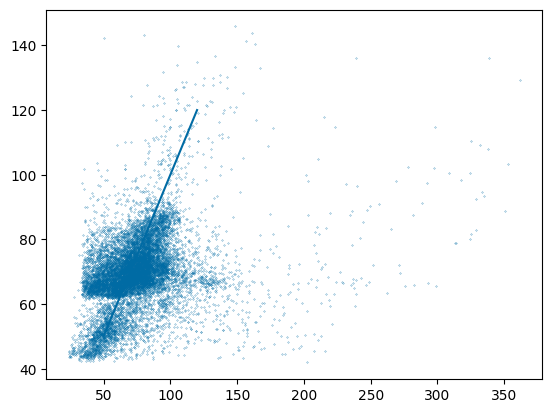

In [79]:
plt.scatter(d['D_a'], d['D_c'], s=.05)
plt.plot([50,120],[50,120])

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/1711764087.py:69: UserWarning: Adding colorbar to a different Figure <Figure size 800x200 with 5 Axes> than <Figure size 1600x800 with 33 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(scatter, ax=axes.ravel().tolist(), orientation='vertical', shrink=0.5, pad=0.01)


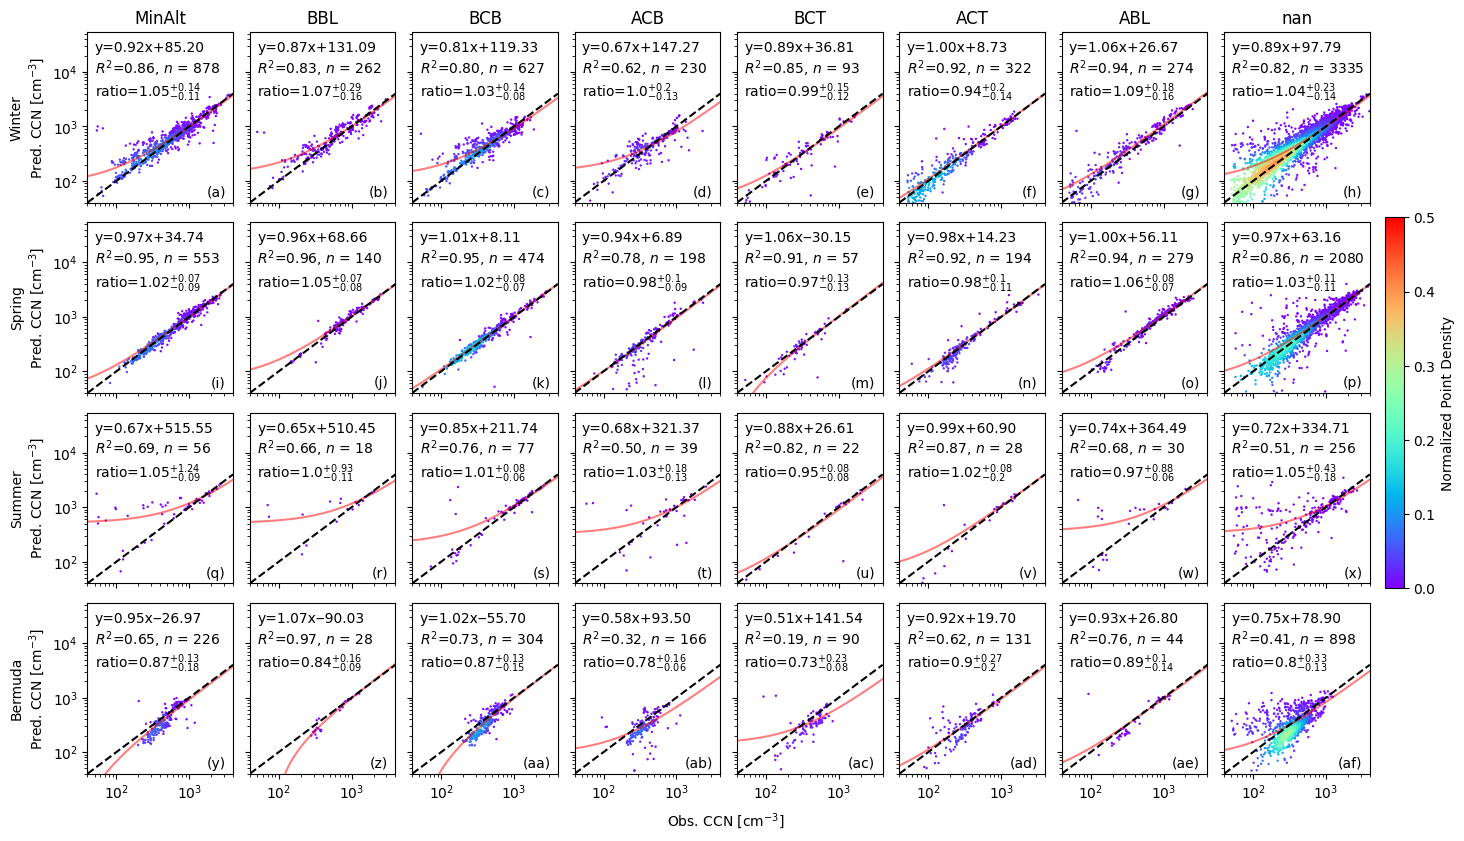

In [80]:
fig,axes = plt.subplots(4,8,figsize=(16, 8),sharex='all', sharey='all')
save_k = ['MinAlt','BBL','BCB','ACB','BCT', 'ACT','ABL',np.nan]

ax_min,ax_max = [40,4000]
j = 0 # range 0 - 7
k = 0 # range 0 - 4
for i, ax in enumerate(axes.flatten()):
    d_i = d_seg[k].loc[d_seg[k]['leg']==save_k[j]]
    if pd.isna(save_k[j]):
        d_i = d_seg[k].loc[pd.isna(d_seg[k]['leg'])]

    
    
    d_i = d_i.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])

    x,y = d_i['N_CCN_stdPT'], d_i['CCN_n_pred']

    # Calculate point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point


    ax.scatter(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'], s=0.5, c=z/z_max , cmap='rainbow', vmin=0, vmax=.25)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(ax_min,ax_max+50000)
    ax.set_xlim(ax_min,ax_max)
    slope, intercept, r_value, p_value, std_err = linregress(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'])
    # Calculate the line of best fit
    fit_line = slope * np.linspace(ax_min,ax_max, num=1000) + intercept
    ax.plot(np.linspace(ax_min,ax_max, num=1000), fit_line, c='r', label=f'm={slope:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
    ax.plot(np.linspace(ax_min,ax_max), np.linspace(ax_min,ax_max), c='black', alpha=1, ls='--')
    
    #ax.legend(fontsize=5, loc='lower right')
    mask = ~np.isnan(d_i['N_CCN_stdPT']) & ~np.isnan(d_i['CCN_n_pred'])
    num_points = np.sum(mask)
    ratio = d_i['CCN_n_pred']/d_i['N_CCN_stdPT']
    lower = round(ratio.quantile(.25) - ratio.median(),2)
    upper = round(ratio.quantile(.75) - ratio.median(),2)

    if intercept < 0:
        sign = '‒'
    else:
        sign = '+'
    ax.text(0.05, 0.95, f"y={slope:.2f}x"+sign+f"{abs(intercept):.2f}\n$R^2$={r_value**2:.2f}, $n$ = {len(d_i['N_CCN_stdPT'])}\nratio={round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$",
          fontsize=10, transform=ax.transAxes,
          verticalalignment='top', horizontalalignment='left')
    if i > 25:
        ax.text(0.95, 0.1, '(a' + chr(97+i-26) + ')',
          fontsize=10, transform=ax.transAxes,
          verticalalignment='top', horizontalalignment='right')
    else:
        ax.text(0.95, 0.1, '(' + chr(97+i) + ')',
            fontsize=10, transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='right')



    # conditions of which leg/df to select
    j+=1
    if j == 8:
        j = 0
        k += 1

#axes[0,0].set_xlim([0,4000])
#axes[0,0].set_ylim([0,4000])
fig.text(0.43, -0.005, 'Obs. CCN [cm$^{-3}$]', ha='center', va='center')
plt.tight_layout()
cbar = fig.colorbar(scatter, ax=axes.ravel().tolist(), orientation='vertical', shrink=0.5, pad=0.01)
cbar.set_label('Normalized Point Density')

season2 = ['Winter', 'Spring', 'Summer', 'Bermuda']
for i in range(0,4):
    axes[i,0].set_ylabel(season2[i]+'\nPred. CCN [cm$^{-3}$]')
'''
for i in range(0,8):
    axes[3,i].set_xlabel('Obs. CCN [cm$^{-3}$]')
'''

for i,ax in enumerate(axes[0,:]):
    ax.set_title(str(save_k[i]))
    

plt.savefig('../figures/season_legs_log.png', bbox_inches='tight', dpi=300)

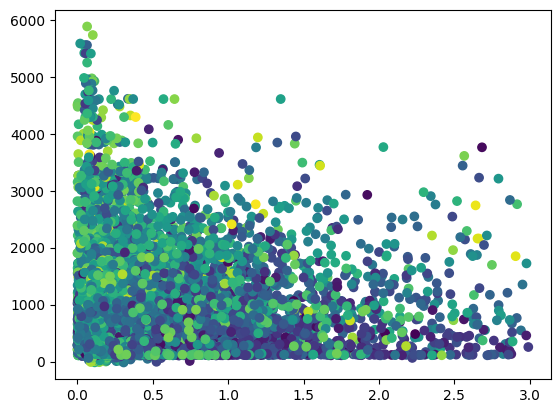

In [81]:
d_sat = d#d[(d['CCN_SS'] >= 0.37) & (d['CCN_SS'] <= 0.43)]
plt.scatter(d_sat['k_obs'], d_sat['GPS_altitude'], c=d_sat['OMF'])

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/2215482876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_sat['altitude_bin'] = pd.cut(d_sat['GPS_altitude'], bins=np.arange(0, d_sat['GPS_altitude'].max() + 500, 500))
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/2215482876.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = d_sat.groupby('altitude_bin').agg(


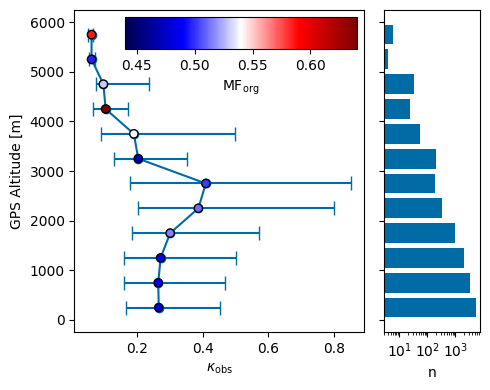

In [82]:
# Bin the data into 500-meter intervals
d_sat = d_sat.dropna(subset=['GPS_altitude', 'k_obs'])
d_sat['altitude_bin'] = pd.cut(d_sat['GPS_altitude'], bins=np.arange(0, d_sat['GPS_altitude'].max() + 500, 500))

# Group by the altitude bins and calculate the median, 25th, and 75th quantiles
grouped = d_sat.groupby('altitude_bin').agg(
    count=('k_obs', 'count'),
    median_k_obs=('k_obs', 'median'),
    q25_k_obs=('k_obs', lambda x: np.quantile(x, 0.25)),
    q75_k_obs=('k_obs', lambda x: np.quantile(x, 0.75)),
    median_OMF=('OMF', 'mean')
).reset_index()

# Extract the midpoint of each bin for plotting
grouped['altitude_mid'] = grouped['altitude_bin'].apply(lambda x: x.mid)

# Plot the medians with error bars

fig,axes = plt.subplots(1,2, width_ratios=[3,1], sharey=True, figsize=(5,4))
ax = axes[0]

ax.errorbar(grouped['median_k_obs'], grouped['altitude_mid'], 
             xerr=[grouped['median_k_obs'] - grouped['q25_k_obs'], grouped['q75_k_obs'] - grouped['median_k_obs']], yerr=None, fmt='o', capsize=5, label='Median with 25-75% quantiles', ls='-', zorder=1)
# Color the points based on the median OMF
#ax.plot(grouped['median_k_obs'], grouped['altitude_mid'])
cb = ax.scatter(grouped['median_k_obs'], grouped['altitude_mid'], c=grouped['median_OMF'], cmap='seismic', label='Median OMF', zorder=10, vmin = 0.54-.1, vmax=0.54+.1, edgecolors='black')
#plt.fill_between(grouped['altitude_mid'], grouped['q25_k_obs'], grouped['q75_k_obs'], alpha=0.2, color='black')
#plt.axvspan(, color='blue', alpha=0.3)
# Add labels and legend
ax.set_xlabel(r'$\kappa_{\rm obs}$')
ax.set_ylabel('GPS Altitude [m]')
#plt.colorbar(label='Median OMF')

axes[1].barh(grouped['altitude_mid'],grouped['count'], height=400)
axes[1].set_xscale('log')
axes[1].set_xlabel('n')

fig.tight_layout()
cbaxes = inset_axes(axes[0], width="80%", height="10%", loc='upper right') 
cbar = plt.colorbar(cb, cax=cbaxes, label=r'MF$_{\rm org}$', location='top',pad=-.05)  # Add a colorbar for density
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.xaxis.set_label_position('bottom')
#plt.legend()
#plt.title('Median k_obs with 25-75% Quantiles vs. GPS Altitude')

# Panel a, 4 curves of the CCN S, color by total number
# Panel b, 4 curves of the k_obs
# number of points panel c

0
1
2
3


/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/3304133958.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_i = d_sat_seasons[i].groupby('altitude_bin').agg(
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/3304133958.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_i = d_sat_seasons[i].groupby('altitude_bin').agg(
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_18130/3304133958.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

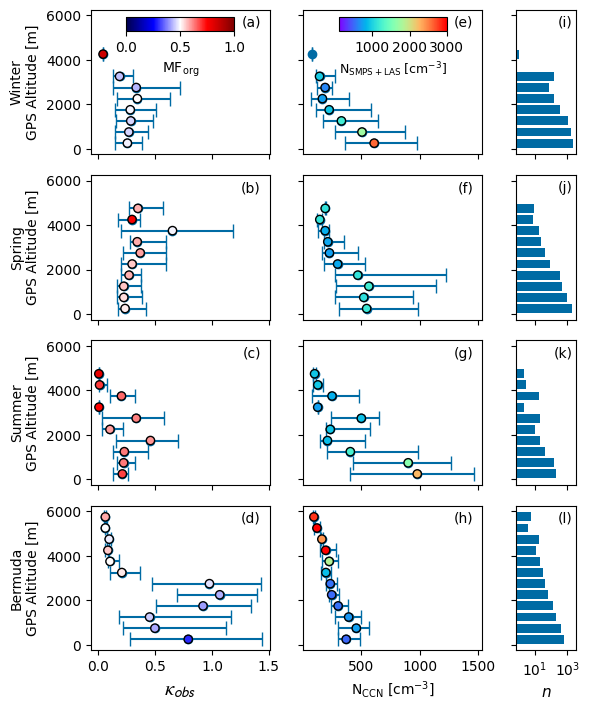

In [83]:
#mpl.rcParams['mathtext.fontset'] = 'stix'
# Bin the data into 500-meter intervals
d_sat = d_sat.dropna(subset=['GPS_altitude', 'k_obs', 'N_CCN_stdPT'])
d_sat['N_tot'] = d_sat['nLAS_AmmSO4']+d_sat['nSMPS']
d_sat['altitude_bin'] = pd.cut(d_sat['GPS_altitude'], bins=np.arange(0, d_sat['GPS_altitude'].max() + 500, 500))

transit_flights = [pd.Timestamp('2022-03-22').date(), pd.Timestamp('2022-05-18').date(), pd.Timestamp('2022-05-21').date(), pd.Timestamp('2022-05-31').date(), pd.Timestamp('2022-06-18').date()]
d_sat_winter = d_sat[d_sat['Time_Mid'].dt.month.isin([11, 12, 1, 2, 3, 4]) & (~d_sat['Time_Mid'].dt.date.isin(transit_flights))]
d_sat_spring = d_sat[d_sat['Time_Mid'].dt.month.isin([5, 6]) & (np.logical_not((d_sat['Time_Mid'].dt.month.isin([6])) & (d_sat['Time_Mid'].dt.year.isin([2022])))) & (~d_sat['Time_Mid'].dt.date.isin(transit_flights))]
d_sat_summer = d_sat[d_sat['Time_Mid'].dt.month.isin([8, 9]) & (~d_sat['Time_Mid'].dt.date.isin(transit_flights))]
d_sat_bermuda = d_sat[(d_sat['Time_Mid'].dt.month.isin([6])) & (d_sat['Time_Mid'].dt.year.isin([2022])) & (~d_sat['Time_Mid'].dt.date.isin(transit_flights))]

d_sat_seasons = [d_sat_winter, d_sat_spring, d_sat_summer, d_sat_bermuda]

groups=[]
for i in range(0,4):
    print(i)
    # Group by the altitude bins and calculate the median, 25th, and 75th quantiles
    grouped_i = d_sat_seasons[i].groupby('altitude_bin').agg(
        count=('k_obs', 'count'),
        median_k_obs=('k_obs', 'median'),
        q25_k_obs=('k_obs', lambda x: np.nan if x.empty else np.quantile(x, 0.25)),
        q75_k_obs=('k_obs', lambda x: np.nan if x.empty else np.quantile(x, 0.75)),
        median_CCN=('N_CCN_stdPT', 'median'),
        q25_CCN=('N_CCN_stdPT', lambda x: np.nan if x.empty else np.quantile(x, 0.25)),
        q75_CCN=('N_CCN_stdPT', lambda x: np.nan if x.empty else np.quantile(x, 0.75)),
        median_N=('N_tot', 'median'),
        median_OMF=('OMF', 'mean')
    ).reset_index()

    # Extract the midpoint of each bin for plotting
    grouped_i['altitude_mid'] = grouped_i['altitude_bin'].apply(lambda x: x.mid)
    groups.append(grouped_i)
# Plot the medians with error bars

fig,axes = plt.subplots(4,3, width_ratios=[3,3,1], sharey='row', sharex='col', figsize=(6,7))

for i in range(0,4):
    ax = axes[i,0]
    grouped_i = groups[i]
    ax.errorbar(grouped_i['median_k_obs'], grouped_i['altitude_mid'], 
                xerr=[grouped_i['median_k_obs'] - grouped_i['q25_k_obs'], grouped_i['q75_k_obs'] - grouped_i['median_k_obs']], yerr=None, fmt='o', capsize=5, label='Median with 25-75% quantiles', ls='', zorder=1)
    # Color the points based on the median OMF
    #ax.plot(grouped['median_k_obs'], grouped['altitude_mid'])
    cb = ax.scatter(grouped_i['median_k_obs'], grouped_i['altitude_mid'], c=grouped_i['median_OMF'], cmap='seismic', label='Median OMF', zorder=10, vmin = 0, vmax=1, edgecolors='black')
    #plt.fill_between(grouped['altitude_mid'], grouped['q25_k_obs'], grouped['q75_k_obs'], alpha=0.2, color='black')
    #plt.axvspan(, color='blue', alpha=0.3)
    # Add labels and legend
    #ax.set_xlabel(r'$\kappa_{\rm obs}$')
    ax.set_ylabel(season2[i]+'\nGPS Altitude [m]')
    #plt.colorbar(label='Median OMF')

    axes[i,2].barh(grouped_i['altitude_mid'],grouped_i['count'], height=400)
    axes[i,2].set_xscale('log')
    axes[i,2].set_xticks([10,1000])
    #axes[0,1].set_xlabel('n')

for i in range(0,4):
    ax = axes[i,1]
    grouped_i = groups[i]
    ax.errorbar(grouped_i['median_CCN'], grouped_i['altitude_mid'], 
                xerr=[grouped_i['median_CCN'] - grouped_i['q25_CCN'], grouped_i['q75_CCN'] - grouped_i['median_CCN']], yerr=None, fmt='o', capsize=5, label='Median with 25-75% quantiles', ls='', zorder=1)
    # Color the points based on the median OMF
    #ax.plot(grouped['median_k_obs'], grouped['altitude_mid'])
    cb2 = ax.scatter(grouped_i['median_CCN'], grouped_i['altitude_mid'], c=grouped_i['median_N'], cmap='rainbow', label='Median OMF', zorder=10, vmin = 100, vmax=3000, edgecolors='black')
    #plt.fill_between(grouped['altitude_mid'], grouped['q25_k_obs'], grouped['q75_k_obs'], alpha=0.2, color='black')
    #plt.axvspan(, color='blue', alpha=0.3)
    # Add labels and legend
    #ax.set_xlabel(r'$\kappa_{\rm obs}$')
    #ax.set_ylabel('GPS Altitude [m]')
    #plt.colorbar(label='Median OMF')

fig.tight_layout()


cbaxes = inset_axes(axes[0,0], width="60%", height="10%", loc='upper center') 
cbar = plt.colorbar(cb, cax=cbaxes, label=r'MF$_{\rm org}$', location='top',pad=-.05)  # Add a colorbar for density
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.xaxis.set_label_position('bottom')

cbaxes = inset_axes(axes[0,1], width="60%", height="10%", loc='upper center') 
cbar = plt.colorbar(cb2, cax=cbaxes, location='top',pad=-.05)  # Add a colorbar for density 
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.xaxis.set_label_position('bottom')
cbar.set_label(label=r'N$_{\rm SMPS+\rm LAS}$ [cm$^{-3}$]', size=9)
#cbar.ax.xaxis.set_ticks([100,1000,2000, 3000])
#plt.legend()
#plt.title('Median k_obs with 25-75% Quantiles vs. GPS Altitude')

axes[3,1].set_xlabel(r'N$_{\rm CCN}$ [cm$^{-3}$]')
axes[3,2].set_xlabel(r'$n$', fontsize=11)

panel_labels = [
    '(a)', '(e)', '(i)',
    '(b)', '(f)', '(j)',
    '(c)', '(g)', '(k)',
    '(d)', '(h)', '(l)'
    ]
for ax, label in zip(axes.flat, panel_labels):
    ax.text(0.95, .96, label, transform=ax.transAxes, va='top', ha='right')

font = FontProperties(math_fontfamily='stix')  # Set STIX for math text
axes[3,0].set_xlabel(r'$\kappa_\mathsf{obs}$', fontsize=15, fontproperties=font)
# Panel a, 4 curves of the CCN S, color by total number
# Panel b, 4 curves of the k_obs
# number of points panel c
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
plt.savefig('../figures/season_altitude.png', bbox_inches='tight', dpi=300)